In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random
from ta.momentum import rsi
import pyodbc
import quantstats as qs
from Rolling_Functions_Final import * 

# Additional

In [22]:
data = Rolling.get_data(['512890', '159967'], 'equal')
df = Rolling.single_window_table(data, [21], 2)


Here at period == equal


In [29]:
def draw_performance(list_of_codes_dict, window_list, title_name, requirement):
        """
        :param list_of_codes_dict: {'513100': 0, '512890': 1333, '159967': 1451}
        :param window_list: [21]
        :param title_name: str
        :param requirement: 1. 'Equal', 2. 'Unequal'

        :return: plot
        """
        list_of_codes = list(list_of_codes_dict.keys())
        Daily_Return = Rolling.get_data(list_of_codes)
        data_table = Rolling.single_window_table(Daily_Return, [21], len(list_of_codes))
        if data_table.iloc[-1, :].isnull().any():
            data_table = data_table.iloc[:-1,:]

        data_plot = pd.DataFrame()
        
        plot_dict = {}


        if requirement == 'Equal':
             data_table = data_table.iloc[max(list_of_codes_dict.values()):,:]
             for i in list_of_codes_dict:
                list_of_codes_dict[str(i)] = 0
             data_table['signal_return_21'] = data_table['signal_return_21']*(100/data_table.loc[:,'signal_return_21'][0])
                  

        for key, value in list_of_codes_dict.items():
            data_plot[f'etf_{str(key)}_return'] = data_table[f'etf_{str(key)}']*(100/data_table.loc[:,f'etf_{str(key)}'][value])
            plot_dict[f'Sharpe_{str(key)}'] = Test.get_Sharpe(data_plot, f'etf_{str(key)}_return')

        plot_dict[f'Sharpe_window_{str(window_list[0])}'] = Test.get_Sharpe(data_table, f'signal_return_{window_list[0]}')

        print(f'The starting date for this Data is from {data_table.index[0]}')
        _ = plt.figure(figsize=(25, 12))
        plt.xlabel('Time') 
        plt.ylabel('Return')
        for item in data_plot:
            _ = plt.plot(np.array(data_plot[f'{str(item)}'].index),data_plot[f'{str(item)}'].values)
        _ = plt.plot(np.array(data_table['signal_return_21'].index),data_table['signal_return_21'].values)

        legend_list = []
        for key, value in plot_dict.items():
             legend_list.append(f'etf_{key[7:]}_return: {round(value, 3)}')
        _ = plt.legend(legend_list)
        plt.title(f"{title_name}", fontsize=20)
        ax = plt.gca()
        ax.xaxis.set_major_locator(ticker.MultipleLocator(500))

Here at starting from the longest period
The starting date for this Data is from 2013-06-13 00:00:00


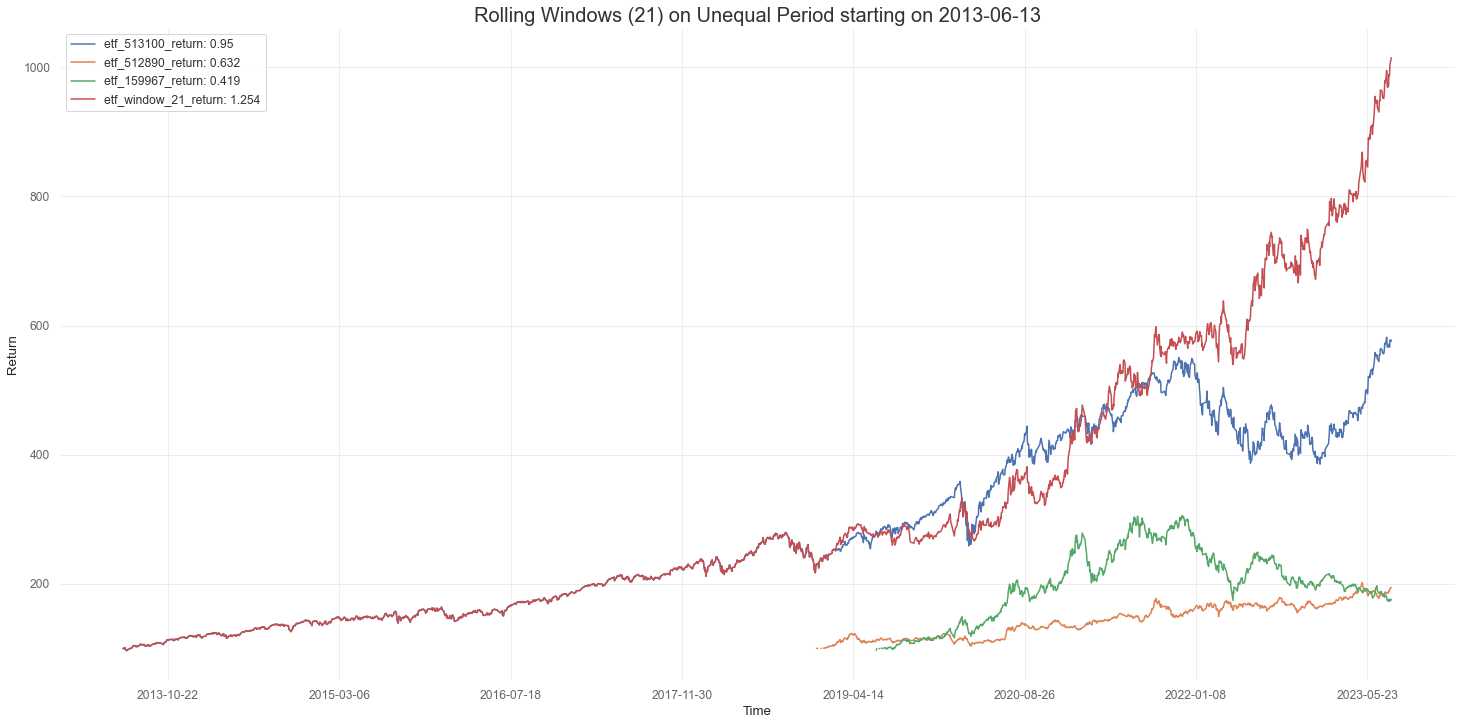

In [30]:
list_of_codes_dict = {'513100': 0, '512890': 1333, '159967': 1451}
window_list = [21]
title_name = "Rolling Windows (21) on Unequal Period starting on 2013-06-13"
requirement = 'Unequal'


draw_performance(list_of_codes_dict, window_list, title_name, requirement)

Here at starting from the longest period
The starting date for this Data is from 2019-07-12 00:00:00


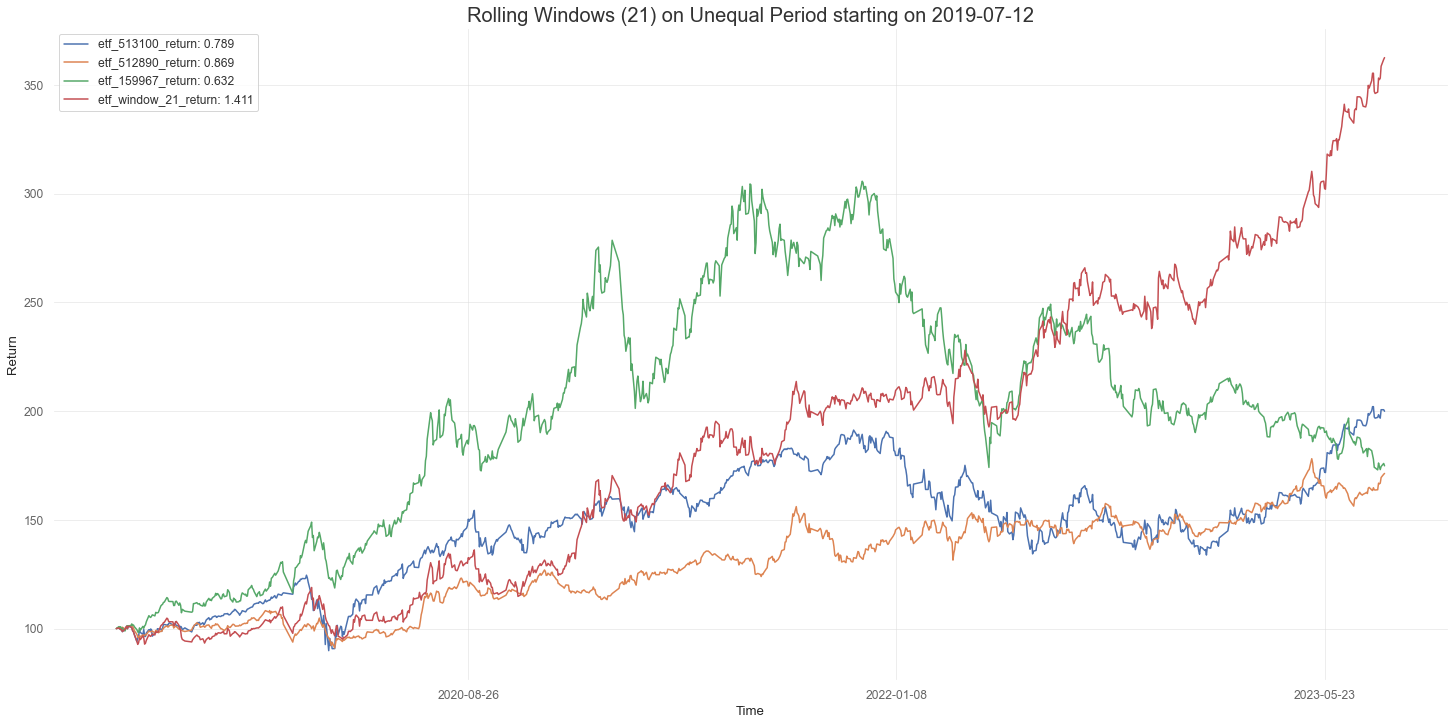

In [32]:
list_of_codes_dict = {'513100': 0, '512890': 1333, '159967': 1451}
window_list = [21]
title_name = "Rolling Windows (21) on Unequal Period starting on 2019-07-12"
requirement = 'Equal'


draw_performance(list_of_codes_dict, window_list, title_name, requirement)

Here at starting from the longest period
The starting date for this Data is from 2019-08-05 00:00:00


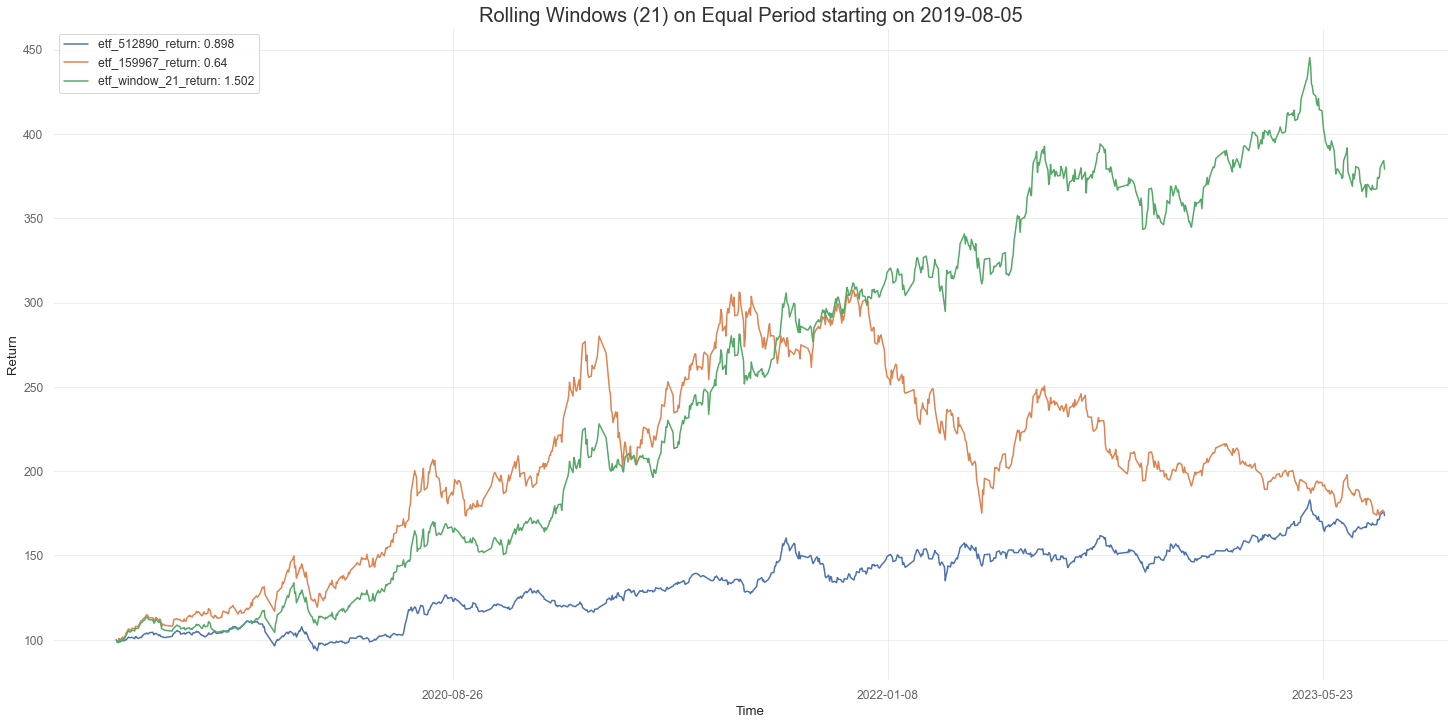

In [35]:
list_of_codes_dict = {'512890': 0, '159967': 118}
window_list = [21]
title_name = "Rolling Windows (21) on Equal Period starting on 2019-08-05"
requirement = 'Equal'


draw_performance(list_of_codes_dict, window_list, title_name, requirement)

# 原策略效果展示

In [453]:
Daily_Return = Rolling.get_data(['512890', '159967'])
data_table = Rolling.single_window_table(Daily_Return, [21], 2)
data_table = data_table.iloc[124:,:]
data_table['signal_return_21'] = data_table['signal_return_21']/data_table['signal_return_21'][0]*100

Here at starting from the longest period


In [454]:
data_table

,etf_512890,etf_159967,etf_512890_day_return,etf_159967_day_return,etf_512890_day_return_21,etf_159967_day_return_21,signal_512890,signal_159967,signal_return_21,arr
EndDate,,,,,,,,,,
2019-08-13,1.0970,1.0336,-0.004989,-0.008537,0.963126,0.993942,0.0,1.0,100.000000,0.991463
2019-08-14,1.0989,1.0446,0.001732,0.010642,0.964709,1.003940,0.0,1.0,101.064241,1.010642
2019-08-15,1.1033,1.0496,0.004004,0.004787,0.976804,1.024900,0.0,1.0,101.547988,1.004787
2019-08-16,1.1028,1.0645,-0.000453,0.014196,0.966013,1.028502,0.0,1.0,102.989551,1.014196
2019-08-19,1.1224,1.0933,0.017773,0.027055,0.990120,1.071548,0.0,1.0,105.775929,1.027055
...,...,...,...,...,...,...,...,...,...,...
2023-08-09,1.8986,1.8050,-0.006593,-0.008187,1.032072,0.976573,1.0,0.0,376.569559,0.993407
2023-08-10,1.9018,1.8094,0.001685,0.002438,1.018640,0.958927,1.0,0.0,377.204249,1.001685
2023-08-11,1.8724,1.7726,-0.015459,-0.020338,1.000534,0.940172,1.0,0.0,371.373034,0.984541


### 换仓次数

In [214]:
count_512890 = sum(data_table['signal_512890'] != data_table['signal_512890'].shift(1))
count_159967 = sum(data_table['signal_159967'] != data_table['signal_159967'].shift(1))
print(f'The positions change for 512890 is {count_512890} and for 159967 is {count_159967}')

The positions change for 512890 is 77 and for 159967 is 77


In [215]:
77*2/968*252

40.09090909090909

### 胜率

In [62]:
sum(data_table['arr']>=1)/len(data_table)

0.5444214876033058

In [64]:
sum(data_table['etf_512890_day_return']>=0/len(data_table))

506

In [65]:
sum(data_table['etf_159967_day_return']>=0/len(data_table))

514

### 收益 & 年化收益

In [222]:
data_table['etf_512890_return'] = np.cumprod(data_table['etf_512890_day_return']+1, axis=0)*100
data_table['etf_512890_return'] = data_table['etf_512890_return']/data_table['etf_512890_return'][0]*100

data_table['etf_159967_return'] = np.cumprod(data_table['etf_159967_day_return']+1, axis=0)*100
data_table['etf_159967_return'] = data_table['etf_159967_return']/data_table['etf_159967_return'][0]*100

In [450]:
data_table

,signal_return_3,signal_return_6,signal_return_9,signal_return_12,signal_return_15,signal_return_18,signal_return_21,signal_return_24,signal_return_27
EndDate,,,,,,,,,
2019-07-05,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-08,97.268852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-12,97.311729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-15,97.604795,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-16,97.473568,99.865553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-08-02,37.550434,99.593942,187.885322,171.883796,135.191132,181.195539,244.273280,250.659231,254.025753
2023-08-03,37.408646,99.739305,188.159550,172.134669,135.388450,181.460002,244.629809,251.025081,254.396516
2023-08-04,38.238796,99.915816,188.492541,172.439300,135.628051,181.781137,245.062737,251.469326,254.846729


In [108]:
annualized_return = round(np.power(data_table['etf_512890_return'][-1]/100,365/len(data_table))*100-100,2)
print(f"Annualized Return: {round(annualized_return, 2)}%")

annualized_return = round(np.power(data_table['etf_159967_return'][-1]/100,365/len(data_table))*100-100,2)
print(f"Annualized Return: {round(annualized_return, 2)}%")

Annualized Return: 23.81%
Annualized Return: 23.76%


In [216]:
## Taking into account the cost of changing positions 
mask_512890 = data_table['signal_512890'] != data_table['signal_512890'].shift(1)
mask_159967 = data_table['signal_159967'] != data_table['signal_159967'].shift(1)


# Select the 'arr' column using the mask and subtract 0.003
data_table.loc[mask_512890, 'arr'] -= 0.003
data_table.loc[mask_159967, 'arr'] -= 0.003

In [217]:
data_table['adj_signal_return_21'] = np.cumprod(data_table['arr'], axis=0)*100
data_table['adj_signal_return_21'] = data_table['adj_signal_return_21']/data_table['adj_signal_return_21'][0]*100

In [218]:
annualized_return = round(np.power(data_table['adj_signal_return_21'][-1]/100,365/len(data_table))*100-100,2)
print(f"Annualized Return: {round(annualized_return, 2)}%")

Annualized Return: 39.58%


In [219]:
annualized_volatility = np.sqrt(252) * data_table['arr'].std()
print(f'Annualized Volatility: {round(annualized_volatility,2)}')

Annualized Volatility: 0.25


In [185]:
data_table

,etf_512890,etf_159967,etf_512890_day_return,etf_159967_day_return,etf_512890_day_return_21,etf_159967_day_return_21,signal_512890,signal_159967,signal_return_21,arr,etf_512890_return,etf_159967_return,adj_signal_return_21,Previous_Peak,Drawdown
EndDate,,,,,,,,,,,,,,,
2019-08-09,1.0903,1.0241,-0.008367,-0.010531,0.960786,0.992345,1.0,0.0,100.000000,0.988633,100.000000,100.000000,100.000000,100.000000,0.000000
2019-08-12,1.1025,1.0425,0.011190,0.017967,0.968975,1.001152,0.0,1.0,101.796700,1.014967,101.118958,101.796700,101.496700,101.496700,0.000000
2019-08-13,1.0970,1.0336,-0.004989,-0.008537,0.963126,0.993942,0.0,1.0,100.927644,0.991463,100.614510,100.927644,100.630205,101.496700,-0.008537
2019-08-14,1.0989,1.0446,0.001732,0.010642,0.964709,1.003940,0.0,1.0,102.001758,1.010642,100.788774,102.001758,101.701153,101.701153,0.000000
2019-08-15,1.1033,1.0496,0.004004,0.004787,0.976804,1.024900,0.0,1.0,102.489991,1.004787,101.192332,102.489991,102.187948,102.187948,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-28,1.9230,1.8010,0.015526,0.008173,1.056129,0.928016,1.0,0.0,384.947189,1.015526,176.373475,175.861732,306.556614,367.854653,-0.166637
2023-07-31,1.9398,1.8156,0.008736,0.008107,1.050926,0.937616,1.0,0.0,388.310222,1.008736,177.914336,177.287374,309.234800,367.854653,-0.159356
2023-08-01,1.9442,1.8043,0.002268,-0.006224,1.057665,0.936715,1.0,0.0,389.191016,1.002268,178.317894,176.183966,309.936229,367.854653,-0.157449


In [186]:
annualized_volatility = np.sqrt(252) * data_table['etf_512890_day_return'].std()
print(f'Annualized Volatility: {round(annualized_volatility,2)}')

annualized_volatility = np.sqrt(252) * data_table['etf_159967_day_return'].std()
print(f'Annualized Volatility: {round(annualized_volatility,2)}')

Annualized Volatility: 0.18
Annualized Volatility: 0.3


In [162]:
data_table

,etf_512890,etf_159967,etf_512890_day_return,etf_159967_day_return,etf_512890_day_return_21,etf_159967_day_return_21,signal_512890,signal_159967,signal_return_21,arr,etf_512890_return,etf_159967_return,adj_signal_return_21
EndDate,,,,,,,,,,,,,
2019-08-09,1.0903,1.0241,-0.008367,-0.010531,0.960786,0.992345,1.0,0.0,100.000000,0.988633,100.000000,100.000000,100.000000
2019-08-12,1.1025,1.0425,0.011190,0.017967,0.968975,1.001152,0.0,1.0,101.796700,1.014967,101.118958,101.796700,101.496700
2019-08-13,1.0970,1.0336,-0.004989,-0.008537,0.963126,0.993942,0.0,1.0,100.927644,0.991463,100.614510,100.927644,100.630205
2019-08-14,1.0989,1.0446,0.001732,0.010642,0.964709,1.003940,0.0,1.0,102.001758,1.010642,100.788774,102.001758,101.701153
2019-08-15,1.1033,1.0496,0.004004,0.004787,0.976804,1.024900,0.0,1.0,102.489991,1.004787,101.192332,102.489991,102.187948
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-28,1.9230,1.8010,0.015526,0.008173,1.056129,0.928016,1.0,0.0,384.947189,1.015526,176.373475,175.861732,306.556614
2023-07-31,1.9398,1.8156,0.008736,0.008107,1.050926,0.937616,1.0,0.0,388.310222,1.008736,177.914336,177.287374,309.234800
2023-08-01,1.9442,1.8043,0.002268,-0.006224,1.057665,0.936715,1.0,0.0,389.191016,1.002268,178.317894,176.183966,309.936229


### 沪深300

In [148]:
test = Rolling.get_index_data('000300')
test.set_index('TradingDay', inplace=True)
test = test.sort_index()

df_000300 = pd.DataFrame(index=test.index)

df_000300['close'] = test['ClosePrice']
df_000300['prev_close'] = test['PrevClosePrice']
df_000300 = df_000300.iloc[len(df_000300)-len(data_table):,:]
df_000300['daily_return'] = (df_000300['close']-df_000300['prev_close'])/df_000300['prev_close']


df_000300['000300_return'] = np.cumprod(df_000300['daily_return']+1, axis=0)*100
df_000300['000300_return'] = df_000300['000300_return']/df_000300['000300_return'][0]*100

In [230]:
sum(df_000300['daily_return']>=0)/len(df_000300)

0.5113636363636364

In [152]:
annualized_return = round(np.power(df_000300['000300_return'][-1]/100,365/len(df_000300))*100-100,2)
print(f"Annualized Return: {round(annualized_return, 2)}%")

Annualized Return: 3.89%


In [165]:
annualized_volatility = np.sqrt(252) * df_000300['daily_return'].std()
print(f'Annualized Volatility: {round(annualized_volatility,2)}')

Annualized Volatility: 0.19


In [318]:
# 计算最大回撤 etf_512890_return
df_000300['Previous_Peak'] = df_000300['000300_return'].cummax()
df_000300['Drawdown'] = df_000300['000300_return'] / df_000300['Previous_Peak'] - 1
max_drawdown = round(df_000300['Drawdown'].min(),4)
max_drawdown

-0.3959

In [181]:
# 计算最大回撤 etf_512890_return
data_table['Previous_Peak'] = data_table['etf_512890_return'].cummax()
data_table['Drawdown'] = data_table['etf_512890_return'] / data_table['Previous_Peak'] - 1
max_drawdown = round(data_table['Drawdown'].min(),4)
max_drawdown

-0.1652

In [182]:
# 计算最大回撤 etf_159967_return
data_table['Previous_Peak'] = data_table['etf_159967_return'].cummax()
data_table['Drawdown'] = data_table['etf_159967_return'] / data_table['Previous_Peak'] - 1
max_drawdown = round(data_table['Drawdown'].min(),4)
max_drawdown

-0.4342

In [184]:
# 计算最大回撤 etf_159967_return
data_table['Previous_Peak'] = data_table['adj_signal_return_21'].cummax()
data_table['Drawdown'] = data_table['adj_signal_return_21'] / data_table['Previous_Peak'] - 1
max_drawdown = round(data_table['Drawdown'].min(),4)
max_drawdown

-0.2025

In [166]:
data_table

,etf_512890,etf_159967,etf_512890_day_return,etf_159967_day_return,etf_512890_day_return_21,etf_159967_day_return_21,signal_512890,signal_159967,signal_return_21,arr,etf_512890_return,etf_159967_return,adj_signal_return_21
EndDate,,,,,,,,,,,,,
2019-08-09,1.0903,1.0241,-0.008367,-0.010531,0.960786,0.992345,1.0,0.0,100.000000,0.988633,100.000000,100.000000,100.000000
2019-08-12,1.1025,1.0425,0.011190,0.017967,0.968975,1.001152,0.0,1.0,101.796700,1.014967,101.118958,101.796700,101.496700
2019-08-13,1.0970,1.0336,-0.004989,-0.008537,0.963126,0.993942,0.0,1.0,100.927644,0.991463,100.614510,100.927644,100.630205
2019-08-14,1.0989,1.0446,0.001732,0.010642,0.964709,1.003940,0.0,1.0,102.001758,1.010642,100.788774,102.001758,101.701153
2019-08-15,1.1033,1.0496,0.004004,0.004787,0.976804,1.024900,0.0,1.0,102.489991,1.004787,101.192332,102.489991,102.187948
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-28,1.9230,1.8010,0.015526,0.008173,1.056129,0.928016,1.0,0.0,384.947189,1.015526,176.373475,175.861732,306.556614
2023-07-31,1.9398,1.8156,0.008736,0.008107,1.050926,0.937616,1.0,0.0,388.310222,1.008736,177.914336,177.287374,309.234800
2023-08-01,1.9442,1.8043,0.002268,-0.006224,1.057665,0.936715,1.0,0.0,389.191016,1.002268,178.317894,176.183966,309.936229


### - 

## Plot the targets

In [223]:
Sharpe_adj_signal_return_21 = Test.get_Sharpe(data_table, 'adj_signal_return_21')
Sharpe_etf_512890_return = Test.get_Sharpe(data_table, 'etf_512890_return')
Sharpe_etf_159967_return = Test.get_Sharpe(data_table, 'etf_159967_return')

Sharpe_000300_return = Test.get_Sharpe(df_000300, '000300_return')


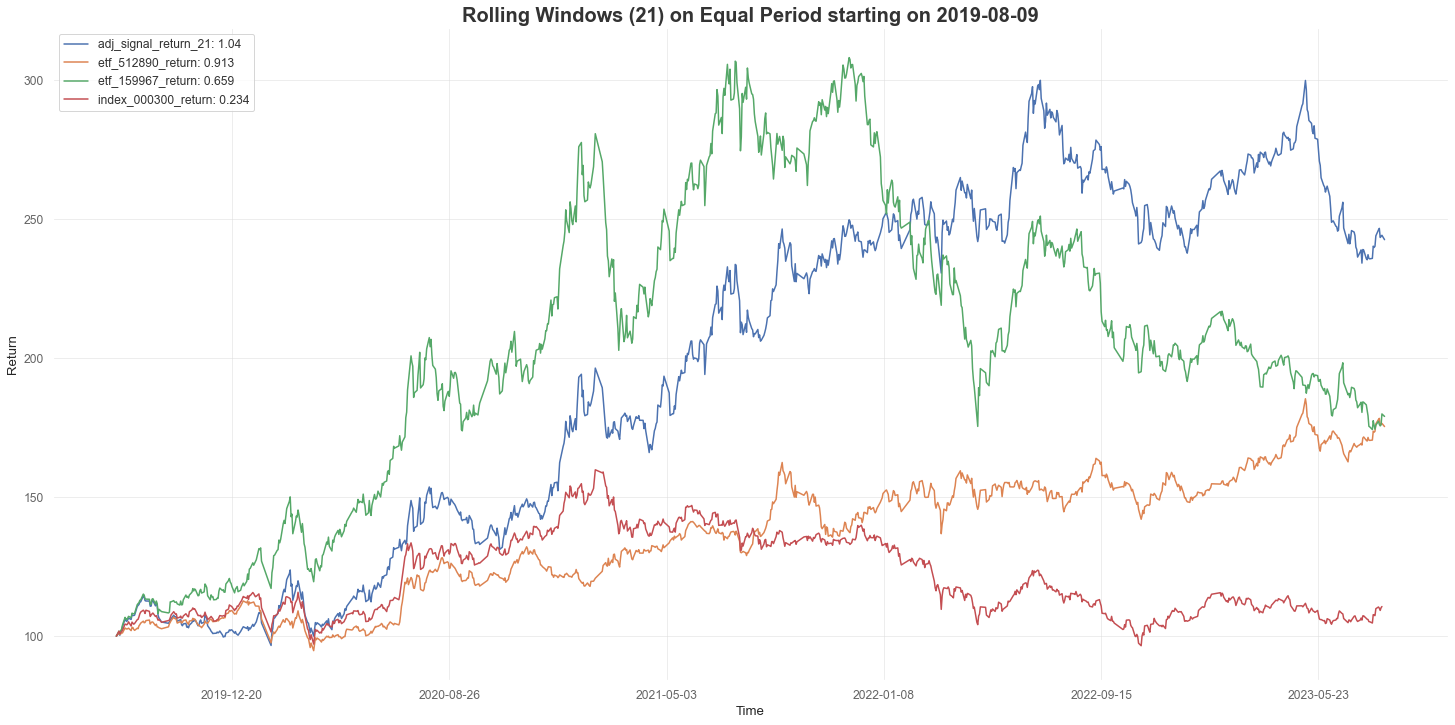

In [224]:
_ = plt.figure(figsize=(25, 12))
plt.xlabel('Time') 
plt.ylabel('Return')

_ = plt.plot(np.array(data_table['adj_signal_return_21'].index),data_table['adj_signal_return_21'].values)
_ = plt.plot(np.array(data_table['etf_512890_return'].index),data_table['etf_512890_return'] .values)
_ = plt.plot(np.array(data_table['etf_159967_return'].index),data_table['etf_159967_return'].values)
_ = plt.plot(np.array(df_000300['000300_return'].index),df_000300['000300_return'].values)





_ = plt.legend([f'adj_signal_return_21: {round(Sharpe_adj_signal_return_21, 3)}', f'etf_512890_return: {round(Sharpe_etf_512890_return, 3)}', 
                f'etf_159967_return: {round(Sharpe_etf_159967_return, 3)}', f'index_000300_return: {round(Sharpe_000300_return, 3)}']) 


plt.title('Rolling Windows (21) on Equal Period starting on 2019-08-09', fontsize=20, fontweight='bold')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(250))


In [225]:
data_table

,etf_512890,etf_159967,etf_512890_day_return,etf_159967_day_return,etf_512890_day_return_21,etf_159967_day_return_21,signal_512890,signal_159967,signal_return_21,arr,adj_signal_return_21,etf_512890_return,etf_159967_return
EndDate,,,,,,,,,,,,,
2019-08-09,1.0903,1.0241,-0.008367,-0.010531,0.960786,0.992345,1.0,0.0,100.000000,0.985633,100.000000,100.000000,100.000000
2019-08-12,1.1025,1.0425,0.011190,0.017967,0.968975,1.001152,0.0,1.0,101.796700,1.011967,101.196700,101.118958,101.796700
2019-08-13,1.0970,1.0336,-0.004989,-0.008537,0.963126,0.993942,0.0,1.0,100.927644,0.991463,100.332766,100.614510,100.927644
2019-08-14,1.0989,1.0446,0.001732,0.010642,0.964709,1.003940,0.0,1.0,102.001758,1.010642,101.400549,100.788774,102.001758
2019-08-15,1.1033,1.0496,0.004004,0.004787,0.976804,1.024900,0.0,1.0,102.489991,1.004787,101.885905,101.192332,102.489991
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,1.9442,1.8043,0.002268,-0.006224,1.057665,0.936715,1.0,0.0,389.191016,1.002268,246.652014,178.317894,176.183966
2023-08-02,1.9184,1.7985,-0.013270,-0.003215,1.045450,0.949678,1.0,0.0,384.026358,0.986730,243.378882,175.951573,175.617615
2023-08-03,1.9212,1.8025,0.001460,0.002224,1.049148,0.955119,1.0,0.0,384.586864,1.001460,243.734106,176.208383,176.008202


In [229]:
39.58-3.89

35.69

# 多样本尝试

In [282]:
Daily_Return = Rolling.get_data(['512480', '588080', '515790', '159869', '159865', '512170', '512690', '512980', '515080', '516950'])
data_table = Rolling.single_window_table(Daily_Return, [21], 10)
data_table = data_table.iloc[791:,:]
data_table['signal_return_21'] = data_table['signal_return_21']/data_table['signal_return_21'][0]*100

Here at starting from the longest period


In [285]:
sum(data_table['arr']>=1)/len(data_table)


0.4917431192660551

In [287]:

data_table.columns

Index(['etf_512980', 'etf_512480', 'etf_588080', 'etf_515790', 'etf_159869',
       'etf_159865', 'etf_512170', 'etf_512690', 'etf_515080', 'etf_516950',
       'etf_512980_day_return', 'etf_512480_day_return',
       'etf_588080_day_return', 'etf_515790_day_return',
       'etf_159869_day_return', 'etf_159865_day_return',
       'etf_512170_day_return', 'etf_512690_day_return',
       'etf_515080_day_return', 'etf_516950_day_return',
       'etf_512980_day_return_21', 'etf_512480_day_return_21',
       'etf_588080_day_return_21', 'etf_515790_day_return_21',
       'etf_159869_day_return_21', 'etf_159865_day_return_21',
       'etf_512170_day_return_21', 'etf_512690_day_return_21',
       'etf_515080_day_return_21', 'etf_516950_day_return_21', 'signal_512980',
       'signal_512480', 'signal_588080', 'signal_515790', 'signal_159869',
       'signal_159865', 'signal_512170', 'signal_512690', 'signal_515080',
       'signal_516950', 'signal_return_21', 'arr'],
      dtype='object')

In [288]:
position_count_df = data_table.iloc[:,-12:-2]

In [289]:
data_table['position_change'] = position_count_df.diff().abs().sum(axis=1)

In [290]:
data_table['adjusted_arr'] = data_table['arr'] - data_table['position_change']*0.003

In [291]:
data_table['adj_signal_return_21'] = np.cumprod(data_table['adjusted_arr'], axis=0)*100
data_table['adj_signal_return_21'] = data_table['adj_signal_return_21']/data_table['adj_signal_return_21'][0]*100

In [292]:
data_table

,etf_512980,etf_512480,etf_588080,etf_515790,etf_159869,etf_159865,etf_512170,etf_512690,etf_515080,etf_516950,...,signal_159865,signal_512170,signal_512690,signal_515080,signal_516950,signal_return_21,arr,position_change,adjusted_arr,adj_signal_return_21
EndDate,,,,,,,,,,,,,,,,,,,,,
2021-05-14,0.8037,1.9642,0.9301,1.0746,0.9410,0.8901,2.5506,2.6960,1.4458,1.0073,...,0.0,1.0,0.0,0.0,0.0,100.000000,1.006630,0.0,1.006630,100.000000
2021-05-17,0.8112,1.9694,0.9504,1.1062,0.9387,0.8963,2.6196,2.7482,1.4445,1.0087,...,0.0,1.0,0.0,0.0,0.0,102.705246,1.027052,0.0,1.027052,102.705246
2021-05-18,0.8170,1.9568,0.9451,1.1015,0.9411,0.8935,2.6034,2.7612,1.4523,1.0068,...,0.0,1.0,0.0,0.0,0.0,102.070101,0.993816,0.0,0.993816,102.070101
2021-05-19,0.8159,1.9824,0.9482,1.1194,0.9402,0.8836,2.5794,2.7322,1.4519,1.0009,...,0.0,1.0,0.0,0.0,0.0,101.129146,0.990781,0.0,0.990781,101.129146
2021-05-20,0.8232,1.9690,0.9510,1.1077,0.9532,0.8893,2.6121,2.7920,1.4334,0.9978,...,0.0,1.0,0.0,0.0,0.0,102.411197,1.012677,0.0,1.012677,102.411197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,0.8291,1.7754,0.6958,1.1599,1.2136,0.7250,1.2852,2.3862,1.7398,1.1609,...,0.0,0.0,1.0,0.0,0.0,107.155136,0.992018,0.0,0.992018,49.039377
2023-08-02,0.8248,1.7778,0.6950,1.1533,1.2055,0.7151,1.2657,2.3784,1.7259,1.1582,...,0.0,0.0,0.0,1.0,0.0,106.299028,0.992011,2.0,0.986011,48.353345
2023-08-03,0.8201,1.7780,0.6963,1.1743,1.1959,0.7199,1.2864,2.3914,1.7345,1.1624,...,0.0,0.0,1.0,0.0,0.0,106.880044,1.005466,2.0,0.999466,48.327517


In [293]:
annualized_volatility = np.sqrt(252) * data_table['adjusted_arr'].std()
print(f'Annualized Volatility: {round(annualized_volatility,2)}')

Annualized Volatility: 0.37


In [294]:
data_table.position_change.sum()/len(data_table)*252

122.06972477064221

In [295]:
data_table['Previous_Peak'] = data_table['adj_signal_return_21'].cummax()
data_table['Drawdown'] = data_table['adj_signal_return_21'] / data_table['Previous_Peak'] - 1
max_drawdown = round(data_table['Drawdown'].min(),4)
max_drawdown

-0.6905

In [296]:
annualized_return = round(np.power(data_table['adj_signal_return_21'][-1]/100,365/len(data_table))*100-100,2)
print(f"Annualized Return: {round(annualized_return, 2)}%")

Annualized Return: -38.89%


In [304]:
data_table['etf_512980_return'] = np.cumprod(data_table['etf_512980_day_return']+1, axis=0)*100
data_table['etf_512980_return'] = data_table['etf_512980_return']/data_table['etf_512980_return'][0]*100

data_table['etf_512480_return'] = np.cumprod(data_table['etf_512480_day_return']+1, axis=0)*100
data_table['etf_512480_return'] = data_table['etf_512480_return']/data_table['etf_512480_return'][0]*100


data_table['etf_588080_return'] = np.cumprod(data_table['etf_588080_day_return']+1, axis=0)*100
data_table['etf_588080_return'] = data_table['etf_588080_return']/data_table['etf_588080_return'][0]*100


data_table['etf_515790_return'] = np.cumprod(data_table['etf_515790_day_return']+1, axis=0)*100
data_table['etf_515790_return'] = data_table['etf_515790_return']/data_table['etf_515790_return'][0]*100


data_table['etf_159869_return'] = np.cumprod(data_table['etf_159869_day_return']+1, axis=0)*100
data_table['etf_159869_return'] = data_table['etf_159869_return']/data_table['etf_159869_return'][0]*100

df_000300_trimmed = df_000300.iloc[-len(data_table):,:]
df_000300_trimmed['000300_return'] = df_000300_trimmed['000300_return']/df_000300_trimmed['000300_return'][0]*100



data_table['etf_159865_return'] = np.cumprod(data_table['etf_159865_day_return']+1, axis=0)*100
data_table['etf_159865_return'] = data_table['etf_159865_return']/data_table['etf_159865_return'][0]*100


data_table['etf_512170_return'] = np.cumprod(data_table['etf_512170_day_return']+1, axis=0)*100
data_table['etf_512170_return'] = data_table['etf_512170_return']/data_table['etf_512170_return'][0]*100


data_table['etf_512690_return'] = np.cumprod(data_table['etf_512690_day_return']+1, axis=0)*100
data_table['etf_512690_return'] = data_table['etf_512690_return']/data_table['etf_512690_return'][0]*100

data_table['etf_515080_return'] = np.cumprod(data_table['etf_515080_day_return']+1, axis=0)*100
data_table['etf_515080_return'] = data_table['etf_515080_return']/data_table['etf_515080_return'][0]*100

data_table['etf_516950_return'] = np.cumprod(data_table['etf_516950_day_return']+1, axis=0)*100
data_table['etf_516950_return'] = data_table['etf_516950_return']/data_table['etf_516950_return'][0]*100



In [300]:
Sharpe_adj_signal_return_21 = Test.get_Sharpe(data_table, 'adj_signal_return_21')
Sharpe_etf_512980_return = Test.get_Sharpe(data_table, 'etf_512980_return')
Sharpe_etf_512480_return = Test.get_Sharpe(data_table, 'etf_512480_return')

Sharpe_etf_588080_return = Test.get_Sharpe(data_table, 'etf_588080_return')
Sharpe_etf_515790_return = Test.get_Sharpe(data_table, 'etf_515790_return')

Sharpe_etf_159869_return = Test.get_Sharpe(data_table, 'etf_159869_return')
Sharpe_etf_159865_return = Test.get_Sharpe(data_table, 'etf_159865_return')

Sharpe_etf_512170_return = Test.get_Sharpe(data_table, 'etf_512170_return')
Sharpe_etf_512690_return = Test.get_Sharpe(data_table, 'etf_512690_return')

Sharpe_etf_515080_return = Test.get_Sharpe(data_table, 'etf_515080_return')
Sharpe_etf_516950_return = Test.get_Sharpe(data_table, 'etf_516950_return')

Sharpe_000300_return = Test.get_Sharpe(df_000300.iloc[-len(data_table):,:], '000300_return')

In [273]:
df_000300['000300_return'].index[-len(data_table):]

DatetimeIndex(['2021-05-11', '2021-05-12', '2021-05-13', '2021-05-14',
               '2021-05-17', '2021-05-18', '2021-05-19', '2021-05-20',
               '2021-05-21', '2021-05-24',
               ...
               '2023-07-24', '2023-07-25', '2023-07-26', '2023-07-27',
               '2023-07-28', '2023-07-31', '2023-08-01', '2023-08-02',
               '2023-08-03', '2023-08-04'],
              dtype='datetime64[ns]', name='TradingDay', length=546, freq=None)

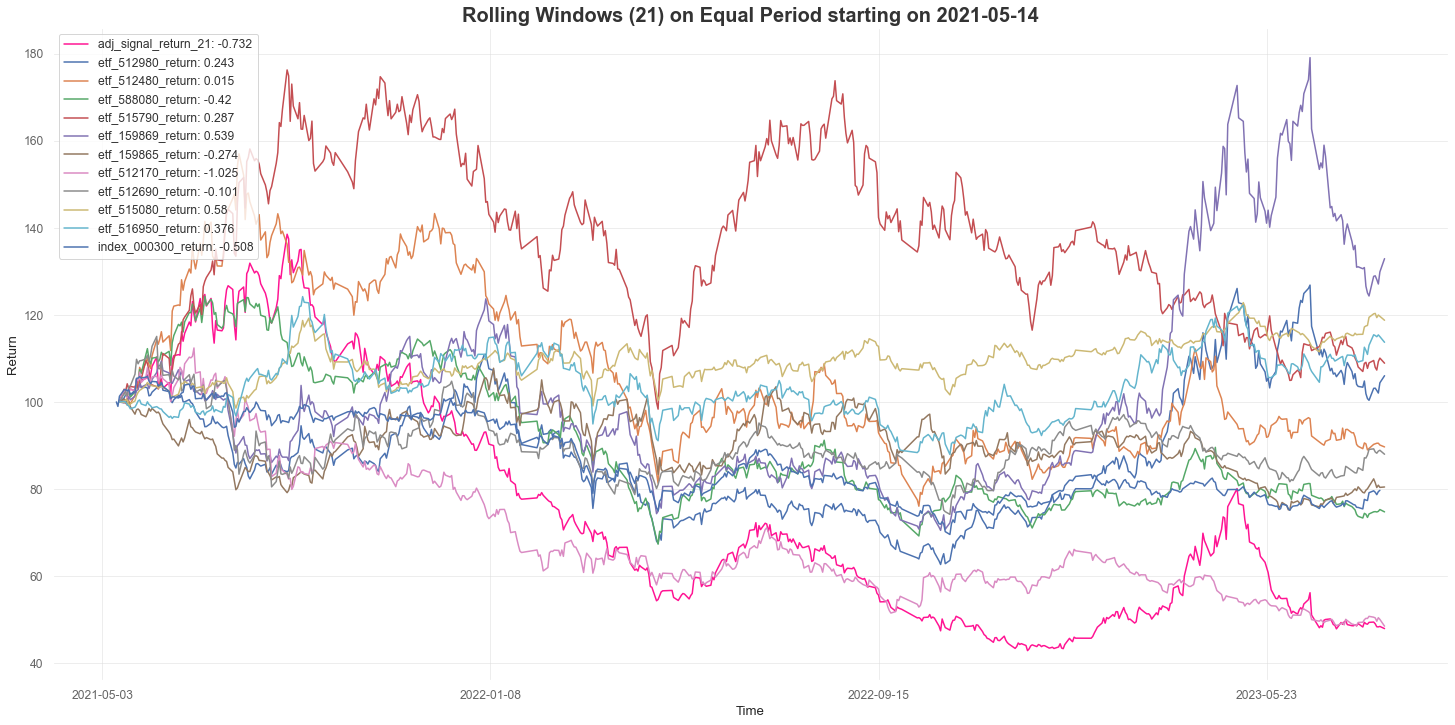

In [308]:
_ = plt.figure(figsize=(25, 12))
plt.xlabel('Time') 
plt.ylabel('Return')

_ = plt.plot(np.array(data_table['adj_signal_return_21'].index),data_table['adj_signal_return_21'].values, color='#FF1493')

_ = plt.plot(np.array(data_table['etf_512980_return'].index),data_table['etf_512980_return'] .values)
_ = plt.plot(np.array(data_table['etf_512480_return'].index),data_table['etf_512480_return'].values)
_ = plt.plot(np.array(data_table['etf_588080_return'].index),data_table['etf_588080_return'] .values)
_ = plt.plot(np.array(data_table['etf_515790_return'].index),data_table['etf_515790_return'].values)
_ = plt.plot(np.array(data_table['etf_159869_return'].index),data_table['etf_159869_return'] .values
)
_ = plt.plot(np.array(data_table['etf_159865_return'].index),data_table['etf_159865_return'].values)
_ = plt.plot(np.array(data_table['etf_512170_return'].index),data_table['etf_512170_return'] .values)
_ = plt.plot(np.array(data_table['etf_512690_return'].index),data_table['etf_512690_return'].values)
_ = plt.plot(np.array(data_table['etf_515080_return'].index),data_table['etf_515080_return'] .values)
_ = plt.plot(np.array(data_table['etf_516950_return'].index),data_table['etf_516950_return'].values)

_ = plt.plot(np.array(df_000300_trimmed['000300_return'].index),df_000300_trimmed['000300_return'].values)





_ = plt.legend([f'adj_signal_return_21: {round(Sharpe_adj_signal_return_21, 3)}', f'etf_512980_return: {round(Sharpe_etf_512980_return, 3)}', 
                f'etf_512480_return: {round(Sharpe_etf_512480_return, 3)}', f'etf_588080_return: {round(Sharpe_etf_588080_return, 3)}', 
                f'etf_515790_return: {round(Sharpe_etf_515790_return, 3)}', f'etf_159869_return: {round(Sharpe_etf_159869_return, 3)}', 
                f'etf_159865_return: {round(Sharpe_etf_159865_return, 3)}', f'etf_512170_return: {round(Sharpe_etf_512170_return, 3)}', 
                f'etf_512690_return: {round(Sharpe_etf_512690_return, 3)}', f'etf_515080_return: {round(Sharpe_etf_515080_return, 3)}', 
                f'etf_516950_return: {round(Sharpe_etf_516950_return, 3)}', f'index_000300_return: {round(Sharpe_000300_return, 3)}']) 


plt.title('Rolling Windows (21) on Equal Period starting on 2021-05-14', fontsize=20, fontweight='bold')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(250))

In [309]:
df_000300_trimmed

,close,prev_close,daily_return,000300_return,Previous_Peak,Drawdown
TradingDay,,,,,,
2021-05-12,5044.5481,5023.0595,0.004278,100.000000,159.836846,-0.131406
2021-05-13,4992.9738,5044.5481,-0.010224,98.977623,159.836846,-0.140287
2021-05-14,5110.5901,4992.9738,0.023556,101.309176,159.836846,-0.120035
2021-05-17,5184.9853,5110.5901,0.014557,102.783940,159.836846,-0.107225
2021-05-18,5187.6013,5184.9853,0.000505,102.835798,159.836846,-0.106775
...,...,...,...,...,...,...
2023-07-31,4014.6301,3992.7376,0.005483,79.583543,159.836846,-0.308742
2023-08-01,3998.0010,4014.6301,-0.004142,79.253898,159.836846,-0.311606
2023-08-02,3969.8950,3998.0010,-0.007030,78.696742,159.836846,-0.316445


In [310]:
annualized_return = round(np.power(df_000300_trimmed['000300_return'][-1]/100,365/len(df_000300_trimmed))*100-100,2)
print(f"Annualized Return: {round(annualized_return, 2)}%")

Annualized Return: -14.1%


In [312]:
sum(df_000300_trimmed['daily_return']>=0)/len(df_000300_trimmed)

0.47889908256880737

In [313]:
annualized_volatility = np.sqrt(252) * df_000300_trimmed['daily_return'].std()
print(f'Annualized Volatility: {round(annualized_volatility,2)}')

Annualized Volatility: 0.18


In [314]:
df_000300_trimmed['Previous_Peak'] = df_000300_trimmed['000300_return'].cummax()
df_000300_trimmed['Drawdown'] = df_000300_trimmed['000300_return'] / df_000300_trimmed['Previous_Peak'] - 1
max_drawdown = round(df_000300_trimmed['Drawdown'].min(),4)
max_drawdown

-0.3431

In [315]:
df_000300_trimmed

,close,prev_close,daily_return,000300_return,Previous_Peak,Drawdown
TradingDay,,,,,,
2021-05-12,5044.5481,5023.0595,0.004278,100.000000,100.000000,0.000000
2021-05-13,4992.9738,5044.5481,-0.010224,98.977623,100.000000,-0.010224
2021-05-14,5110.5901,4992.9738,0.023556,101.309176,101.309176,0.000000
2021-05-17,5184.9853,5110.5901,0.014557,102.783940,102.783940,0.000000
2021-05-18,5187.6013,5184.9853,0.000505,102.835798,102.835798,0.000000
...,...,...,...,...,...,...
2023-07-31,4014.6301,3992.7376,0.005483,79.583543,105.890155,-0.248433
2023-08-01,3998.0010,4014.6301,-0.004142,79.253898,105.890155,-0.251546
2023-08-02,3969.8950,3998.0010,-0.007030,78.696742,105.890155,-0.256808


In [316]:
47.94-79.7

-31.760000000000005

# 窗口优化

In [498]:
Daily_Return = Rolling.get_data(['512480', '588080', '515790', '159869', '159865', '512170', '512690', '512980', '515080', '516950'])
window_list = [3,6,9,12,15,18,21,24,27]
target_num = 10


plot_df = Rolling.rolling_optimization_table(Daily_Return, window_list, target_num)

Here at starting from the longest period


In [490]:
def rolling_optimization_table_mod(data, window_list, target_num):
        """

        :param data: DataFrame from get_data
        :param window_list: [3,6,9,12,15,18,21,24,27]
        :param target_num: len(list_of_codes)

        :return: data_table
        """
        # parameter type: list, DataFrame, int
        
        data_table = pd.DataFrame()
        A = target_num
        for i in window_list:
            data_x = data.copy()
            signal_name = []
            
            for num, name in enumerate(data_x.columns[A:]):
                data_x[f'{name}_{str(i)}'] = data_x[data_x.columns[num]].rolling(window=i).apply(lambda x: x[-1]/x[0])
                signal_name.append(f'signal_{data_x.columns[num][4:]}')
            
            data_x = data_x.iloc[i:,:]
            for name in signal_name:
                data_x[name] = [0] * len(data_x)
            
            for row in range(len(data_x)):
                value = data_x.iloc[row][2*A:3*A].max()
                series = data_x.iloc[row]
                try:
                    position = series[2*A:3*A][series == value].idxmax()
                except:
                    continue
                old_position = series.index.get_loc(position)
                new_position = old_position + A
                data_x.loc[data_x.index[row],series.index[new_position]] = 1
            
            for name in data_x.columns[-A:]:
                data_x[name] = data_x[name].shift(1)
            
            data_x = data_x[1:]
            
            data_x[f'signal_return_{str(i)}'] = [0] * len(data_x)
            arr = []

            for row in range(len(data_x)):
                value = data_x.iloc[row][3*A:4*A].max()
                series = data_x.iloc[row]
                ## find the position of signal with 1 
                position = series[3*A:4*A][series == value].idxmax()
                old_position = series.index.get_loc(position)
                new_position = old_position - 2*A
                arr.append(series[new_position] + 1)
                
            data_x['arr'] = arr
            data_x[f'signal_return_{str(i)}'] = np.cumprod(arr, axis=0)*100

            #-----------------------modified sector---------------------------------------#
            position_count_df = data_x.iloc[:,-2-target_num:-2]
            data_x['position_change'] = position_count_df.diff().abs().sum(axis=1)
            data_x['position_change'] = data_x['position_change']/2

            data_x['adjusted_arr'] = data_x['arr'] - data_x['position_change']*0.003
            data_x[f'adj_signal_return_{str(i)}'] = np.cumprod(data_x['adjusted_arr'], axis=0)*100

            data_x[f'adj_signal_return_{str(i)}'] = (100/data_x[f'adj_signal_return_{str(i)}'].values[0]) * data_x[f'adj_signal_return_{str(i)}']
            data_table[f'signal_return_{str(i)}'] = data_x[f'adj_signal_return_{str(i)}']

        return data_table

In [491]:
plot_df = rolling_optimization_table_mod(Daily_Return, window_list, target_num)

In [500]:
plot_df = plot_df.iloc[-552:-1,:]
for i in plot_df.columns:
    plot_df[f'{i}'] = plot_df.loc[:,f'{i}']/plot_df.loc[:,f'{i}'][0]*100

In [501]:
plot_df

,signal_return_3,signal_return_6,signal_return_9,signal_return_12,signal_return_15,signal_return_18,signal_return_21,signal_return_24,signal_return_27
EndDate,,,,,,,,,
2021-05-14,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2021-05-17,101.936202,102.705246,99.910084,101.936202,102.705246,102.705246,102.705246,101.936202,102.705246
2021-05-18,101.503097,103.191080,100.382696,102.418398,102.070101,102.070101,102.070101,102.418398,102.070101
2021-05-19,103.152580,102.107297,99.328409,102.390189,101.129146,101.129146,101.129146,101.474232,100.998092
2021-05-20,102.074427,102.408816,100.587631,101.320004,103.342572,102.411197,102.411197,102.760658,103.208649
...,...,...,...,...,...,...,...,...,...
2023-08-08,90.795442,112.107735,138.419151,134.669769,90.413019,90.829908,106.102377,93.414448,100.770754
2023-08-09,87.564522,108.628665,133.493560,134.669769,90.413019,90.829908,106.102377,93.414448,100.770754
2023-08-10,87.877252,109.890257,133.736482,134.442861,90.260680,90.676867,105.923603,93.257052,100.600963


In [503]:
Sharpe_signal_return_3 = Test.get_Sharpe(plot_df, 'signal_return_3')
Sharpe_signal_return_6 = Test.get_Sharpe(plot_df, 'signal_return_6')
Sharpe_signal_return_9 = Test.get_Sharpe(plot_df, 'signal_return_9')

Sharpe_signal_return_12 = Test.get_Sharpe(plot_df, 'signal_return_12')
Sharpe_signal_return_15 = Test.get_Sharpe(plot_df, 'signal_return_15')
Sharpe_signal_return_18 = Test.get_Sharpe(plot_df, 'signal_return_18')

Sharpe_signal_return_21 = Test.get_Sharpe(plot_df, 'signal_return_21')
Sharpe_signal_return_24 = Test.get_Sharpe(plot_df, 'signal_return_24')
Sharpe_signal_return_27 = Test.get_Sharpe(plot_df, 'signal_return_27')

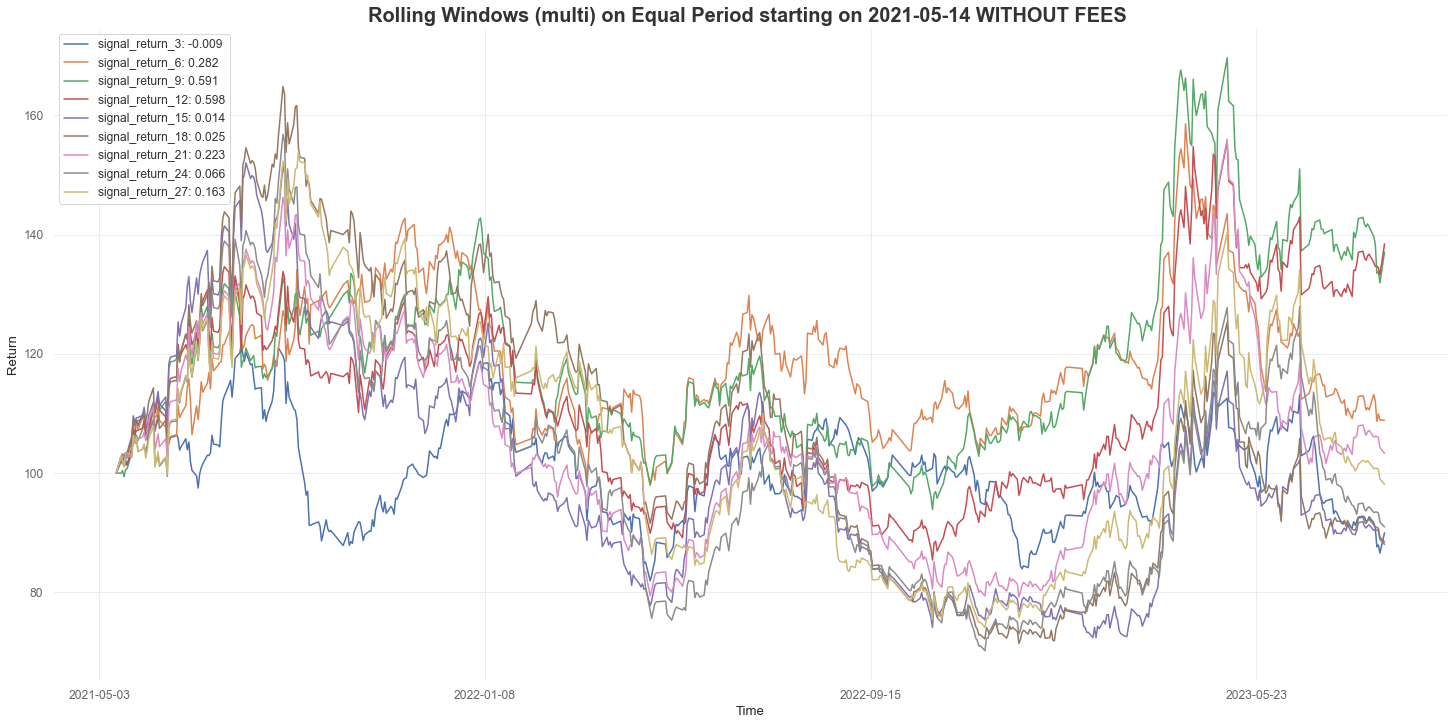

In [505]:
_ = plt.figure(figsize=(25, 12))
plt.xlabel('Time') 
plt.ylabel('Return')

_ = plt.plot(np.array(plot_df['signal_return_3'].index),plot_df['signal_return_3'].values)
_ = plt.plot(np.array(plot_df['signal_return_6'].index),plot_df['signal_return_6'].values)
_ = plt.plot(np.array(plot_df['signal_return_9'].index),plot_df['signal_return_9'].values)

_ = plt.plot(np.array(plot_df['signal_return_12'].index),plot_df['signal_return_12'].values)
_ = plt.plot(np.array(plot_df['signal_return_15'].index),plot_df['signal_return_15'].values)
_ = plt.plot(np.array(plot_df['signal_return_18'].index),plot_df['signal_return_18'].values)

_ = plt.plot(np.array(plot_df['signal_return_21'].index),plot_df['signal_return_21'].values)
_ = plt.plot(np.array(plot_df['signal_return_24'].index),plot_df['signal_return_24'].values)
_ = plt.plot(np.array(plot_df['signal_return_27'].index),plot_df['signal_return_27'].values)


_ = plt.legend([f'signal_return_3: {round(Sharpe_signal_return_3, 3)}', f'signal_return_6: {round(Sharpe_signal_return_6, 3)}', f'signal_return_9: {round(Sharpe_signal_return_9, 3)}', 
                f'signal_return_12: {round(Sharpe_signal_return_12, 3)}', f'signal_return_15: {round(Sharpe_signal_return_15, 3)}', f'signal_return_18: {round(Sharpe_signal_return_18, 3)}', 
                f'signal_return_21: {round(Sharpe_signal_return_21, 3)}', f'signal_return_24: {round(Sharpe_signal_return_24, 3)}', f'signal_return_27: {round(Sharpe_signal_return_27, 3)}']) 


plt.title('Rolling Windows (multi) on Equal Period starting on 2021-05-14 WITHOUT FEES ', fontsize=20, fontweight='bold')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(250))

# Corr Test

In [506]:
   def corr_test(list_of_codes, attempts_time, sample_size, display_num, comparison_target, window_list, method):
        """
        
        :param list_of_codes:['512480', '159869', '512170', '512690', '512980']
        :param attempts_time:1000
        :param sample_size:2
        :param display_num:100
        :param comparison_target: 1. 'Price'; 2. 'Return'
        :param window_list:[3,6,9,12,15,18,21,24,27]
        :param method: 1. 'equal'; 2. 'full_period'
        
        :return the top No. of combo with lowest correlation and their corresponding return, Sharpe, and Windows
        """
        # parameter type: list, list
        winner_corr = {}
        unique_codes = []
        
        for i in range(attempts_time):
            random_codes = random.sample(list_of_codes, sample_size)
            
            # Check if the new random_codes are already present in the set of unique codes
            n = 0
            while random_codes in unique_codes:

                random_codes = random.sample(list_of_codes, sample_size)
                n += 1
                if n >10:
                    break
            
            # Add the new random_codes to the set of unique codes
            unique_codes.append(random_codes)
            
            data = get_data(random_codes)
            if method == 'equal':
                data = get_data(random_codes, "equal")
                
            # Price Correlation
            data = data.iloc[1:,:].iloc[:,:sample_size]
            correlation = data[data.columns[0]].corr(data[data.columns[1]])
            
            # Return Correlation
            if comparison_target == 'Return':
                data = data.iloc[1:,:].iloc[:,sample_size:]
                correlation = data[data.columns[0]].corr(data[data.columns[1]])
                

            if len(winner_corr) > display_num - 1:
                if correlation > list(winner_corr.keys())[-1]:
                    continue
                if correlation is None:
                    continue
                # Remove the last key-value pair
                winner_corr.popitem()
            winner_corr[correlation]=random_codes
            # Sort the dictionary based on keys
            winner_corr = dict(sorted(winner_corr.items()))
        print('********************************************************************************')
        print(f'Here are the Top {len(winner_corr.keys())} Combination with the lowest correlation score')
        

        plot_corr = []
        plot_Sharpe = []
        plot_return = []
        for rank, correlation_score in enumerate(winner_corr.keys()):
            
            data = get_data(winner_corr[correlation_score])
            if method == 'equal':
                data = get_data(winner_corr[correlation_score], 'equal')
                
            data_table  = rolling_optimization_table_mod(data, window_list, 2)
            last_row = data_table.iloc[-1]
            largest_value = last_row.max()
            largest_column = last_row.idxmax()
            plot_corr.append(round(correlation_score,3))
            plot_return.append(round(largest_value,3))
            
            # Calculate strategy performance metrics
            result = {}
            metrics = ["avg_return", "volatility", "sharpe", "max_drawdown", "win_rate"]
            

            
            for column in data_table.columns:
                result[column] = []
                for metric in metrics:
                    metric_function = getattr(qs.stats, metric)
                    r = metric_function(data_table[column])
                    result[column].append(r)

            result = pd.DataFrame(result, index=metrics)
            plot_Sharpe.append(round(result.loc["sharpe", largest_column],3))
            
            print(f'No.{rank+1}: {winner_corr[correlation_score]} with a score of {round(correlation_score,3)} and its max return is {round(largest_value,3)} with Sharpe {round(result.loc["sharpe", largest_column],3)} at Windows={largest_column[14:]}\n')
        
        fig, axs = plt.subplots(1, 2, figsize=(15, 8))

        # Left subplot
        axs[0].scatter(plot_corr, plot_Sharpe)
        axs[0].set_title(f'Correlation vs. Sharpe on Windows={largest_column[14:]}')

        # Right subplot
        axs[1].scatter(plot_corr, plot_return)
        axs[1].set_title(f'Correlation vs. Return on Windows={largest_column[14:]}')

        plt.show()

        
        return None

In [508]:
    def get_data(list_of_codes, period=None, list_of_types=None):
        """
        :param list_of_codes:
        :param period: ('full', 'equal')
        :param list_of_types: 1. 'ETF', 2. 'INDEX'

        :return: DataFrame
        """
        def compare_index_difference(df1, df2):
            index1 = set(df1.index)
            index2 = set(df2.index)

            missing_indices_df1 = index2 - index1
            missing_indices_df2 = index1 - index2

            return missing_indices_df1, missing_indices_df2
            
        # parameter type: list
        item_list = []
        for i in range(len(list_of_codes)):
            if list_of_types is None:
    #             print("Length of names and types does not match. Please input the list_of_types") 
                etf_data = Rolling.get_ETF_data(list_of_codes[i])
                etf_data = etf_data[['EndDate', 'AccumulatedUnitNV']].set_index('EndDate')
                etf_data = etf_data.rename(columns={'AccumulatedUnitNV': f"etf_{str(list_of_codes[i])}"})
                etf_data = etf_data[~etf_data.index.duplicated(keep='first')]
                item_list.append(etf_data)
            else:
                if list_of_types[i] == 'INDEX':
                    index_data = Rolling.get_index_data(list_of_codes[i])
                    index_data = index_data[['TradingDay', 'ClosePrice']].set_index('TradingDay')
                    index_data = index_data.rename(columns={'ClosePrice': f"index_{str(list_of_codes[i])}"})
                    index_data = index_data[~etf_data.index.duplicated(keep='first')]
                    item_list.append(index_data)
                if list_of_types[i] == 'ETF':
                    etf_data = Rolling.get_ETF_data(list_of_codes[i])
                    etf_data = etf_data[['EndDate', 'AccumulatedUnitNV']].set_index('EndDate')
                    etf_data = etf_data.rename(columns={'AccumulatedUnitNV': f"etf_{str(list_of_codes[i])}"})
                    etf_data = etf_data[~etf_data.index.duplicated(keep='first')]
                    item_list.append(etf_data)
            
            
        ## DataFrame Length Manipulation
        if period == "equal":
            # print('Here at period == equal')
            shortest_length = len(item_list[0]) + 1
            shortest_index = -1
            # Find the shortest DataFrame
            list_of_index = []
            for i, df in enumerate(item_list):
                list_of_index.append(i)
                if len(df) < shortest_length:
                    shortest_length = len(df)
                    shortest_index = i
            # Align all length based on the shortest DF
            for i, df in enumerate(item_list):
                if i == shortest_index:
                    continue
                item_list[i] = df.drop(compare_index_difference(df, item_list[shortest_index])[1])

            data = pd.concat([item_list[0], item_list[1]], axis=1)

            for index in list_of_index[2:]:
                data = pd.concat([data, item_list[index]], axis=1)
            data = data.dropna().iloc[:]
            data.index = pd.to_datetime(data.index)

            # 计算每日涨跌幅和滚动收益率
            for column in data.columns:
                data[f'{column}_day_return'] = data[column].rolling(2).apply(lambda x:(x[-1]-x[0])/x[0])
            return data
    
        else:
            # print('Here at starting from the longest period')
            longest_length = len(item_list[0])
            longest_index = 0

            # Find the longest DataFrame
            list_of_index = []
            for i, df in enumerate(item_list):
                list_of_index.append(i)
                if len(df) > longest_length:
                    longest_length = len(df)
                    longest_index = i

            # Align all length based on the shortest DF
            data = item_list[longest_index]
            for i, df in enumerate(item_list):
                if i == longest_index:
                    continue
                data = pd.concat([data, df], axis=1)
            data.index = pd.to_datetime(data.index)
            data = data


            # 计算每日涨跌幅和滚动收益率
            for column in data.columns:
                data[f'{column}_day_return'] = data[column].rolling(2).apply(lambda x:(x[-1]-x[0])/x[0])
            data = data[1:]
            return data

********************************************************************************
Here are the Top 83 Combination with the lowest correlation score
No.1: ['588080', '512890'] with a score of -0.718 and its max return is 161.061 with Sharpe 0.935 at Windows=21

No.2: ['515080', '588080'] with a score of -0.565 and its max return is 117.602 with Sharpe 0.395 at Windows=18

No.3: ['512890', '159865'] with a score of -0.557 and its max return is 125.68 with Sharpe 0.57 at Windows=21

No.4: ['515080', '159865'] with a score of -0.544 and its max return is 101.06 with Sharpe 0.122 at Windows=21

No.5: ['515790', '512980'] with a score of -0.508 and its max return is 137.65 with Sharpe 0.53 at Windows=24

No.6: ['515080', '512980'] with a score of -0.505 and its max return is 183.193 with Sharpe 0.834 at Windows=24

No.7: ['159869', '159865'] with a score of -0.383 and its max return is 130.133 with Sharpe 0.497 at Windows=6

No.8: ['515790', '159869'] with a score of -0.381 and its max return

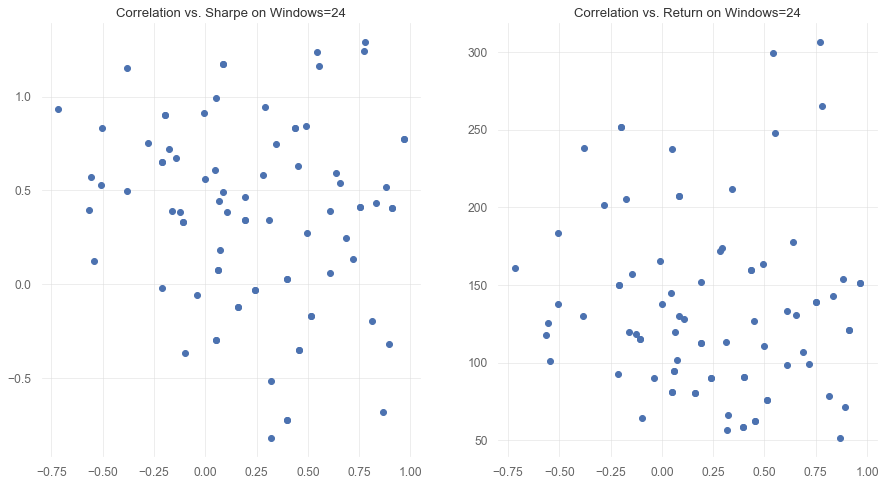

In [565]:
list_of_codes = ['512980', '512480', '588080', '515790', '159869', '159865', '512170', '512690', '515080', '516950', '512890', '159967']
attempts_time = 300
sample_size = 2
display_num =  100
comparison_target = 'Price'
window_list = [3, 6, 9, 12, 15, 18, 21, 24, 27]
method = 'equal'

corr_test(list_of_codes, attempts_time, sample_size, display_num, comparison_target, window_list, method)

# MA Return

In [514]:
    def rolling_optimization_table_MA_mod(data, window_list, target_num):
        """
        :param data: DataFrame from get_date
        :param target_num: 2

        :return: data_table
        """
        # parameter type: list, DataFrame, int
        
        data_table = pd.DataFrame()

        for i in window_list:
            data_x = data.copy()
            signal_name = []
            
            for num, name in enumerate(data_x.columns[target_num:]):
                data_x[f'{name}_{str(i)}'] = data_x[data_x.columns[num]].rolling(window=i).mean().pct_change()
                signal_name.append(f'signal_{data_x.columns[num][4:]}')
            
            data_x = data_x.iloc[i:,:]
            for name in signal_name:
                data_x[name] = [0] * len(data_x)
            
            for row in range(len(data_x)):
                value = data_x.iloc[row][2*target_num:3*target_num].max()
                series = data_x.iloc[row]
                try:
                    position = series[2*target_num:3*target_num][series == value].idxmax()
                except:
                    continue
                old_position = series.index.get_loc(position)
                new_position = old_position + target_num
                data_x.loc[data_x.index[row],series.index[new_position]] = 1
            
            for name in data_x.columns[-target_num:]:
                data_x[name] = data_x[name].shift(1)
            
            data_x = data_x[1:]
            
            data_x[f'signal_return_{str(i)}'] = [0] * len(data_x)
            arr = []
            X = target_num
            for row in range(len(data_x)):
                value = data_x.iloc[row][3*X:4*X].max()
                series = data_x.iloc[row]
                ## find the position of signal with 1 
                try:
                    position = series[3*X:4*X][series == value].idxmax()
                except:
                    continue
                old_position = series.index.get_loc(position)
                new_position = old_position - 2*X
                arr.append(series[new_position] + 1)
                
            data_x['arr'] = arr
            data_x[f'signal_return_{str(i)}'] = np.cumprod(arr, axis=0)*100

                        #-----------------------modified sector---------------------------------------#
            position_count_df = data_x.iloc[:,-2-target_num:-2]
            data_x['position_change'] = position_count_df.diff().abs().sum(axis=1)
            data_x['adjusted_arr'] = data_x['arr'] - data_x['position_change']*0.0003
            data_x[f'adj_signal_return_{str(i)}'] = np.cumprod(data_x['adjusted_arr'], axis=0)*100

            data_x[f'adj_signal_return_{str(i)}'] = (100/data_x[f'adj_signal_return_{str(i)}'].values[0]) * data_x[f'adj_signal_return_{str(i)}']
            data_table[f'signal_return_{str(i)}'] = data_x[f'adj_signal_return_{str(i)}']

        return data_table


In [515]:
    def test_better_return(list_of_codes, attempts_time, sample_size, display_num, comparison_target, window_list, method):
        """
        
        :param list_of_codes:['512480', '159869', '512170', '512690', '512980']
        :param attempts_time:1000
        :param sample_size:2
        :param display_num:100
        :param comparison_target: DataFrame
        :param window_list:[3,6,9,12,15,18,21,24,27]
        :param method: 1. 'equal'; 3. 'full_period'
        
        :return the top No. of combo with lowest correlation and their corresponding return, Sharpe, and Windows
        """
        # parameter type: list, list
        winner_corr = {}
        unique_codes = []
        modified_R = 0
        original_R = 0
        for i in range(attempts_time):
            random_codes = random.sample(list_of_codes, sample_size)
            
            # Check if the new random_codes are already present in the set of unique codes
            n = 0
            while random_codes in unique_codes:

                random_codes = random.sample(list_of_codes, sample_size)
                n += 1
                if n >10:
                    break
            
            # Add the new random_codes to the set of unique codes
            unique_codes.append(random_codes)
            
            data = get_data(random_codes)
            if method == 'equal':
                data = get_data(random_codes, 'equal')
                
            # Price Correlation
            data_P = data.iloc[1:,:].iloc[:,:sample_size]
            correlation = data_P[data_P.columns[0]].corr(data_P[data_P.columns[1]])
            
            # Return Correlation
            if comparison_target == 'Return':
                data_R = data.iloc[1:,:].iloc[:,sample_size:]
                correlation = data_R[data_R.columns[0]].corr(data_R[data_R.columns[1]])
                

            if len(winner_corr) > display_num - 1:
                if correlation > list(winner_corr.keys())[-1]:
                    continue
                if correlation is None:
                    continue
                # Remove the last key-value pair
                winner_corr.popitem()
            winner_corr[correlation]=random_codes
            # Sort the dictionary based on keys
            winner_corr = dict(sorted(winner_corr.items()))
        print('********************************************************************************')
        print(f'Here are the Top {len(winner_corr.keys())} Combination with the lowest correlation score')
        

        for rank, correlation_score in enumerate(winner_corr.keys()):
            
            data = get_data(winner_corr[correlation_score])
            if method == 'equal':
                data = get_data(winner_corr[correlation_score])
    
            data_table  = rolling_optimization_table_mod(data, window_list, 2)
            data_table_MA  = rolling_optimization_table_MA_mod(data, window_list, 2)
            
            last_row = data_table.iloc[-1]
            largest_value = last_row.max()
            largest_column = last_row.idxmax()
            
            last_row_MA = data_table_MA.iloc[-1]
            largest_value_MA = last_row_MA.max()
            largest_column_MA = last_row_MA.idxmax()

            
            # Calculate strategy performance metrics
            result = {}
            metrics = ["avg_return", "volatility", "sharpe", "max_drawdown", "win_rate"]
            
            for column in data_table.columns:
                result[column] = []
                for metric in metrics:
                    metric_function = getattr(qs.stats, metric)
                    r = metric_function(data_table[column])
                    result[column].append(r)

            result = pd.DataFrame(result, index=metrics)
            
            # Calculate strategy performance metrics on MA return Strat
            result_MA = {}
            metrics_MA = ["avg_return", "volatility", "sharpe", "max_drawdown", "win_rate"]
            
            for column_MA in data_table_MA.columns:
                result_MA[column_MA] = []
                for metric_MA in metrics_MA:
                    metric_function_MA = getattr(qs.stats, metric_MA)
                    r_MA = metric_function_MA(data_table_MA[column_MA])
                    result_MA[column_MA].append(r_MA)

            result_MA = pd.DataFrame(result_MA, index=metrics_MA)
            

            if largest_value_MA > largest_value:
                modified_R += 1
                print(f'No.{rank+1}: {winner_corr[correlation_score]} perform better on modified MA Strategy with a max return of {round(largest_value_MA,3)} with Sharpe {round(result_MA.loc["sharpe", largest_column_MA],3)} at Windows={largest_column_MA[14:]}')
                print(f'     The original strategy Strategy has a max return {round(largest_value,3)} with Sharpe {round(result.loc["sharpe", largest_column],3)} at Windows={largest_column[14:]}')
                print('************************************************************************************************************')
            if largest_value > largest_value_MA:
                original_R += 1
                print(f'No.{rank+1}: {winner_corr[correlation_score]} perform better on the original Strategy with a max return {round(largest_value,3)} with Sharpe {round(result.loc["sharpe", largest_column],3)} at Windows={largest_column[14:]}')
                print(f'     The modified MA strategy Strategy has a max return {round(largest_value_MA,3)} with Sharpe {round(result_MA.loc["sharpe", largest_column_MA],3)} at Windows={largest_column_MA[14:]}')
                print('************************************************************************************************************')

                
        print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')
        print(f'Given {len(winner_corr.keys())} combinations with lowest correlation score \n We found {modified_R} groups perform better on MA Strat and {original_R} perform better on the original Start')
        return None

In [516]:
list_of_codes = ['512980', '512480', '588080', '515790', '159869', '159865', '512170', '512690', '515080', '516950', '512890', '159967']
attempts_time = 300
sample_size = 2
display_num =  100
comparison_target = 'Price'
window_list = [21]
method = 'equal'

test_better_return(list_of_codes, attempts_time, sample_size, display_num, comparison_target, window_list, method)

********************************************************************************
Here are the Top 83 Combination with the lowest correlation score
No.1: ['588080', '512890'] perform better on the original Strategy with a max return 222.413 with Sharpe 0.998 at Windows=21
     The modified MA strategy Strategy has a max return 209.026 with Sharpe 0.926 at Windows=21
************************************************************************************************************
No.2: ['588080', '515080'] perform better on modified MA Strategy with a max return of 170.542 with Sharpe 0.85 at Windows=21
     The original strategy Strategy has a max return 148.149 with Sharpe 0.653 at Windows=21
************************************************************************************************************
No.3: ['159865', '512890'] perform better on the original Strategy with a max return 172.132 with Sharpe 0.731 at Windows=21
     The modified MA strategy Strategy has a max return 167.183 with S

In [518]:
data = get_data(['512890', '159967'], period='equal')
window_list = [3, 6, 9, 12, 15, 18, 21, 24, 27]

data_table  = rolling_optimization_table_mod(data, window_list, 2)
data_table_MA  = rolling_optimization_table_MA_mod(data, window_list, 2)

In [519]:
data_table

,signal_return_3,signal_return_6,signal_return_9,signal_return_12,signal_return_15,signal_return_18,signal_return_21,signal_return_24,signal_return_27
EndDate,,,,,,,,,
2019-07-05,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-08,97.568852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-12,97.611861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-15,98.198667,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-16,98.066642,99.865553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-08-10,96.486778,162.672387,265.116339,230.228718,183.827066,230.600559,303.391738,300.306888,298.817173
2023-08-11,94.995185,159.363918,259.724341,226.669603,180.985276,227.035696,298.701593,295.664432,294.197747
2023-08-14,95.035773,158.953916,260.427645,226.603390,181.062604,227.132699,298.829216,295.790758,294.323445


In [520]:
data_table_MA

,signal_return_3,signal_return_6,signal_return_9,signal_return_12,signal_return_15,signal_return_18,signal_return_21,signal_return_24,signal_return_27
EndDate,,,,,,,,,
2019-07-05,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-08,97.808852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-12,97.851967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-15,98.110652,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-16,97.919878,99.865553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-08-10,266.933552,302.633877,296.233649,293.499512,301.519923,271.318391,340.386337,333.746004,289.156952
2023-08-11,262.807016,296.478838,290.208779,288.962291,296.858715,267.124069,335.124291,328.586611,284.686864
2023-08-14,262.919302,297.281669,290.994632,289.085753,296.985551,267.238200,335.267476,328.727003,284.808499


In [521]:
    def test_stability(list_of_codes, attempts_time, sample_size, display_num, window_list, comparison_target, method):
        """
        
        :param list_of_codes:['512480', '159869', '512170', '512690', '512980']
        :param attempts_time:1000
        :param sample_size:2
        :param display_num:100
        :param window_list:[3,6,9,12,15,18,21,24,27]
        :param comparison_target
        :param method: 1. 'equal'; 3. 'full_period'
        
        :return the top No. of combo with lowest correlation and their corresponding return, Sharpe, and Windows
        """
        # parameter type: list, list
        winner_corr = {}
        unique_codes = []
        modified_R = 0
        original_R = 0
        modified_R_v = []
        original_R_v = []
        for i in range(attempts_time):
            random_codes = random.sample(list_of_codes, sample_size)
            
            # Check if the new random_codes are already present in the set of unique codes
            n = 0
            while random_codes in unique_codes:

                random_codes = random.sample(list_of_codes, sample_size)
                n += 1
                if n >10:
                    break
            
            # Add the new random_codes to the set of unique codes
            unique_codes.append(random_codes)
            
            data = get_data(random_codes)
            if method == 'equal':
                data = get_data(random_codes, 'equal')
                
            # Price Correlation
            data_P = data.iloc[1:,:].iloc[:,:sample_size]
            correlation = data_P[data_P.columns[0]].corr(data_P[data_P.columns[1]])
            
            # Return Correlation
            if comparison_target == 'Return':
                data_R = data.iloc[1:,:].iloc[:,sample_size:]
                correlation = data_R[data_R.columns[0]].corr(data_R[data_R.columns[1]])
                

            if len(winner_corr) > display_num - 1:
                if correlation > list(winner_corr.keys())[-1]:
                    continue
                if correlation is None:
                    continue
                # Remove the last key-value pair
                winner_corr.popitem()
            winner_corr[correlation]=random_codes
            # Sort the dictionary based on keys
            winner_corr = dict(sorted(winner_corr.items()))
        print('********************************************************************************')
        print(f'Here are the Top {len(winner_corr.keys())} Combination with the lowest correlation score')
        

        for rank, correlation_score in enumerate(winner_corr.keys()):
            # print(f'This is what we have in Winner_corr.keys(): {winner_corr.keys()}')
            
            data = get_data(winner_corr[correlation_score])
            if method == 'equal':
                data = get_data(winner_corr[correlation_score], 'equal')

                
            data_table  = rolling_optimization_table_mod(data, window_list, 2)
            data_table_MA  = rolling_optimization_table_MA_mod(data, window_list, 2)
            
            last_row = data_table.iloc[-1]
            largest_value = last_row.max()
            largest_column = last_row.idxmax()
    #         sample_mean = np.mean(last_row)
    #         sample_var = 0
    #         for i in last_row:
    #             value = (i - sample_mean)**2
    #             sample_var += value
    #         sample_var = sample_var/(len(last_row)-1)
                
            
            last_row_MA = data_table_MA.iloc[-1]
            largest_value_MA = last_row_MA.max()
            largest_column_MA = last_row_MA.idxmax()
    #         sample_mean_MA = np.mean(last_row_MA)
    #         sample_var_MA = 0
    #         for i in last_row_MA:
    #             value = (i - sample_mean_MA)**2
    #             sample_var_MA += value
    #         sample_var_MA = sample_var_MA/(len(last_row_MA)-1)

            
            # Calculate strategy performance metrics
            result = {}
            metrics = ["avg_return", "volatility", "sharpe", "max_drawdown", "win_rate"]
            
            for column in data_table.columns:
                result[column] = []
                for metric in metrics:
                    metric_function = getattr(qs.stats, metric)
                    r = metric_function(data_table[column])
                    result[column].append(r)

            result = pd.DataFrame(result, index=metrics)
            old_var = result.iloc[2,:].var()
            print('________________________________________________________________')
            
            # Calculate strategy performance metrics on MA return Strat
            result_MA = {}
            metrics_MA = ["avg_return", "volatility", "sharpe", "max_drawdown", "win_rate"]
            
            for column_MA in data_table_MA.columns:
                result_MA[column_MA] = []
                for metric_MA in metrics_MA:
                    metric_function_MA = getattr(qs.stats, metric_MA)
                    r_MA = metric_function_MA(data_table_MA[column_MA])
                    result_MA[column_MA].append(r_MA)

            result_MA = pd.DataFrame(result_MA, index=metrics_MA)
            # print(result_MA)
            new_var = result_MA.iloc[2,:].var()
            
            # print(f'Here are the old_var {old_var} and new_var {new_var}')
            if new_var < old_var:
                modified_R += 1
                difference = old_var - new_var
                modified_R_v.append(difference)
                print(f'No.{rank+1}: {winner_corr[correlation_score]} with a lower variance on MA Strat')
                print(f'1) Old Strategy return has a variance of {old_var}\n{last_row}')
                print(f'2) MA Strategy return has a variance of {new_var}\n{last_row_MA}')
                print('************************************************************************************************************')
                
            

            if old_var < new_var:
                original_R += 1
                difference = new_var - old_var
                original_R_v.append(difference)
                print(f'No.{rank+1}: {winner_corr[correlation_score]} with a lower variance on OLD Strat')
                print(f'1) Old Strategy return has a variance of {old_var}\n{last_row}')
                print(f'2) MA Strategy return has a variance of {new_var}\n{last_row_MA}')
                print('************************************************************************************************************')
                
        print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')
        print(f'Given {len(winner_corr.keys())} combinations with lowest correlation score \n We found {modified_R} groups shows a smaller variance on MA Strat with an average variance difference of {sum(modified_R_v)/len(modified_R_v)} and {original_R} groups shows a smaller variance on the original Start with an average variance difference of {sum(original_R_v)/len(original_R_v)}')
        return None

In [522]:
list_of_codes = ['512980', '512480', '588080', '515790', '159869', '159865', '512170', '512690', '515080', '516950', '512890', '159967']
attempts_time = 300
sample_size = 2
display_num =  100
window_list = [3,6,9,12,15,18,21,24,27]
method = 'equal'

test_stability(list_of_codes, attempts_time, sample_size, display_num, window_list, comparison_target, method)

********************************************************************************
Here are the Top 83 Combination with the lowest correlation score
________________________________________________________________
No.1: ['588080', '512890'] with a lower variance on MA Strat
1) Old Strategy return has a variance of 0.12207466198865531
signal_return_3      82.255691
signal_return_6     113.059268
signal_return_9     111.919399
signal_return_12    107.295606
signal_return_15    107.865323
signal_return_18    146.131890
signal_return_21    161.061094
signal_return_24    139.056719
signal_return_27    113.098012
Name: 2023-08-16 00:00:00, dtype: float64
2) MA Strategy return has a variance of 0.03397366599400248
signal_return_3     129.301159
signal_return_6     146.247188
signal_return_9     148.651178
signal_return_12    127.384984
signal_return_15    161.781323
signal_return_18    156.908161
signal_return_21    151.366804
signal_return_24    163.834683
signal_return_27    123.421280
Name: 

In [523]:
    def test_stability_return(list_of_codes, attempts_time, sample_size, display_num, window_list, comparison_target, method):
        """
        
        :param list_of_codes:['512480', '159869', '512170', '512690', '512980']
        :param attempts_time:1000
        :param sample_size:2
        :param display_num:100
        :param window_list:[3,6,9,12,15,18,21,24,27]
        :param comparison_target
        :param method: 1. 'equal'; 3. 'full_period'
        
        :return the top No. of combo with lowest correlation and their corresponding return, Sharpe, and Windows
        """
        # parameter type: list, list
        winner_corr = {}
        unique_codes = []
        modified_R = 0
        original_R = 0
        modified_R_v = []
        original_R_v = []
        for i in range(attempts_time):
            random_codes = random.sample(list_of_codes, sample_size)
            
            # Check if the new random_codes are already present in the set of unique codes
            n = 0
            while random_codes in unique_codes:

                random_codes = random.sample(list_of_codes, sample_size)
                n += 1
                if n >10:
                    break
            
            # Add the new random_codes to the set of unique codes
            unique_codes.append(random_codes)
            
            data = get_data(random_codes)
            if method == 'equal':
                data = get_data(random_codes, 'equal')
                
            # Price Correlation
            data_P = data.iloc[1:,:].iloc[:,:sample_size]
            correlation = data_P[data_P.columns[0]].corr(data_P[data_P.columns[1]])
            
            # Return Correlation
            if comparison_target == 'Return':
                data_R = data.iloc[1:,:].iloc[:,sample_size:]
                correlation = data_R[data_R.columns[0]].corr(data_R[data_R.columns[1]])
                

            if len(winner_corr) > display_num - 1:
                if correlation > list(winner_corr.keys())[-1]:
                    continue
                if correlation is None:
                    continue
                # Remove the last key-value pair
                winner_corr.popitem()
            winner_corr[correlation]=random_codes
            # Sort the dictionary based on keys
            winner_corr = dict(sorted(winner_corr.items()))
        print('********************************************************************************')
        print(f'Here are the Top {len(winner_corr.keys())} Combination with the lowest correlation score')
        

        for rank, correlation_score in enumerate(winner_corr.keys()):
            # print(f'This is what we have in Winner_corr.keys(): {winner_corr.keys()}')
            
            data = get_data(winner_corr[correlation_score])
            if method == 'equal':
                data = get_data(winner_corr[correlation_score], 'equal')

                
            data_table  = rolling_optimization_table_mod(data, window_list, 2)
            data_table_MA  = rolling_optimization_table_MA_mod(data, window_list, 2)
            
            last_row = data_table.iloc[-1]
            largest_value = last_row.max()
            largest_column = last_row.idxmax()
    #         sample_mean = np.mean(last_row)
    #         sample_var = 0
    #         for i in last_row:
    #             value = (i - sample_mean)**2
    #             sample_var += value
    #         sample_var = sample_var/(len(last_row)-1)
                
            
            last_row_MA = data_table_MA.iloc[-1]
            largest_value_MA = last_row_MA.max()
            largest_column_MA = last_row_MA.idxmax()
    #         sample_mean_MA = np.mean(last_row_MA)
    #         sample_var_MA = 0
    #         for i in last_row_MA:
    #             value = (i - sample_mean_MA)**2
    #             sample_var_MA += value
    #         sample_var_MA = sample_var_MA/(len(last_row_MA)-1)

            
            # Calculate strategy performance metrics
            result = {}
            metrics = ["avg_return", "volatility", "sharpe", "max_drawdown", "win_rate"]
            
            for column in data_table.columns:
                result[column] = []
                for metric in metrics:
                    metric_function = getattr(qs.stats, metric)
                    r = metric_function(data_table[column])
                    result[column].append(r)

            result = pd.DataFrame(result, index=metrics)
            # print(result)
            old_var = result.iloc[0,:].var()
            print('________________________________________________________________')
            
            # Calculate strategy performance metrics on MA return Strat
            result_MA = {}
            metrics_MA = ["avg_return", "volatility", "sharpe", "max_drawdown", "win_rate"]
            
            for column_MA in data_table_MA.columns:
                result_MA[column_MA] = []
                for metric_MA in metrics_MA:
                    metric_function_MA = getattr(qs.stats, metric_MA)
                    r_MA = metric_function_MA(data_table_MA[column_MA])
                    result_MA[column_MA].append(r_MA)

            result_MA = pd.DataFrame(result_MA, index=metrics_MA)
            # print(result_MA)
            new_var = result_MA.iloc[0,:].var()
            
            # print(f'Here are the old_var {old_var} and new_var {new_var}')
            if new_var < old_var:
                modified_R += 1
                difference = old_var - new_var
                modified_R_v.append(difference)
                print(f'No.{rank+1}: {winner_corr[correlation_score]} with a lower variance on MA Strat')
                print(f'1) Old Strategy return has a variance of {old_var}\n{last_row}')
                print(f'2) MA Strategy return has a variance of {new_var}\n{last_row_MA}')
                print('************************************************************************************************************')
                
            

            if old_var < new_var:
                original_R += 1
                difference = new_var - old_var
                original_R_v.append(difference)
                print(f'No.{rank+1}: {winner_corr[correlation_score]} with a lower variance on OLD Strat')
                print(f'1) Old Strategy return has a variance of {old_var}\n{last_row}')
                print(f'2) MA Strategy return has a variance of {new_var}\n{last_row_MA}')
                print('************************************************************************************************************')
                
        print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')
        print(f'Given {len(winner_corr.keys())} combinations with lowest correlation score \n We found {modified_R} groups shows a smaller variance on MA Strat with an average variance difference of {sum(modified_R_v)/len(modified_R_v)} and {original_R} groups shows a smaller variance on the original Start with an average variance difference of {sum(original_R_v)/len(original_R_v)}')
        return None

In [524]:
list_of_codes = ['512980', '512480', '588080', '515790', '159869', '159865', '512170', '512690', '515080', '516950', '512890', '159967']
attempts_time = 300
sample_size = 2
display_num =  100
window_list = [3,6,9,12,15,18,21,24,27]
method = 'equal'

test_stability_return(list_of_codes, attempts_time, sample_size, display_num, window_list, comparison_target, method)

********************************************************************************
Here are the Top 83 Combination with the lowest correlation score
________________________________________________________________
No.1: ['588080', '512890'] with a lower variance on MA Strat
1) Old Strategy return has a variance of 9.404502312600896e-08
signal_return_3      82.255691
signal_return_6     113.059268
signal_return_9     111.919399
signal_return_12    107.295606
signal_return_15    107.865323
signal_return_18    146.131890
signal_return_21    161.061094
signal_return_24    139.056719
signal_return_27    113.098012
Name: 2023-08-16 00:00:00, dtype: float64
2) MA Strategy return has a variance of 2.7000532571975562e-08
signal_return_3     129.301159
signal_return_6     146.247188
signal_return_9     148.651178
signal_return_12    127.384984
signal_return_15    161.781323
signal_return_18    156.908161
signal_return_21    151.366804
signal_return_24    163.834683
signal_return_27    123.421280
N

# RSI

In [525]:
def apply_RSI(target_num, window_list, data_table):
        """
        :param list_of_codes: ['510050', '512890']
        :param window_list: 
        :param data_table: DataFrame

        :return: DataFrame
        """
        
        for name in data_table.iloc[:,:target_num].columns:
            data_table[f'{name}_RSI'] = rsi(data_table[name], window=window_list[0])
        data_table = data_table.iloc[window_list[0]:,:]
        return data_table

In [527]:
def RSI(data, window_list, target_num):
        """
        :param data: DataFrame from get_data
        :param window_list: [21]
        :param target_num: 2 

        :return: data_list
        """
        # parameter type: list, DataFrame, int
        A = target_num
        for i in window_list:
            data_x = data.copy()
            _data = data.copy()
            data_RSI = apply_RSI(target_num, window_list, _data)
            
            signal_name = []
            for num, name in enumerate(data_x.columns[A:]):
                data_x[f'{name}_{str(i)}'] = data_x[data_x.columns[num]].rolling(window=i).apply(lambda x: x[-1]/x[0])
                signal_name.append(f'signal_{data_x.columns[num][4:]}')
            
            data_x = data_x.iloc[i:,:]
            for name in signal_name:
                data_x[name] = [0] * len(data_x)
    
            ############################################## Modified Zone for RSI ##################################################
            for row in range(len(data_x)):
                a = data_x.iloc[row][2*A:3*A]
                b = data_RSI.iloc[row][2*A:3*A]

                RSI_dict = {}
                for item1, item2 in zip(a, b):
                    RSI_dict[item1] = item2

                target = max(RSI_dict)

                if RSI_dict[target] >= 70:
                    if min(RSI_dict.values()) >= 70:
                        target = target
                    else:
                        target = next((key for key, value in sorted(RSI_dict.items(), key=lambda x: x[1], reverse=True) if value < 70), None)
                series = data_x.iloc[row]
                value_index = series[series == target].index.tolist()
                try:
                    position = value_index[0]
                except:
                    continue
                old_position = series.index.get_loc(position)
                new_position = old_position + A
                data_x.loc[data_x.index[row],series.index[new_position]] = 1
            
            #############################################################################################################
            
            for name in data_x.columns[-A:]:
                data_x[name] = data_x[name].shift(1)
            
            data_x = data_x[1:]
            
            data_x[f'signal_return_{str(i)}'] = [0] * len(data_x)
            arr = []
            
            for row in range(len(data_x)):
                value = data_x.iloc[row][3*A:4*A].max()
                series = data_x.iloc[row]
                ## find the position of signal with 1 
                position = series[3*A:4*A][series == value].idxmax()
                old_position = series.index.get_loc(position)
                new_position = old_position - 2*A
                arr.append(series[new_position] + 1)
                
            data_x['arr'] = arr
            data_x[f'signal_return_{str(i)}'] = np.cumprod(arr, axis=0)*100

            
                        #-----------------------modified sector---------------------------------------#
            position_count_df = data_x.iloc[:,-2-target_num:-2]
            data_x['position_change'] = position_count_df.diff().abs().sum(axis=1)
            data_x['adjusted_arr'] = data_x['arr'] - data_x['position_change']*0.0003
            data_x[f'adj_signal_return_{str(i)}'] = np.cumprod(data_x['adjusted_arr'], axis=0)*100

            data_x[f'adj_signal_return_{str(i)}'] = (100/data_x[f'adj_signal_return_{str(i)}'].values[0]) * data_x[f'adj_signal_return_{str(i)}']
        return data_x

In [534]:
data = get_data(['159967', '512890'])
window_list = [21]

RSI_df = RSI(data, window_list, 2)

In [558]:

RSI_df = RSI(data, window_list, 2)
RSI_df = RSI_df.iloc[124:-5,:]
RSI_df['adj_signal_return_21'] = RSI_df['adj_signal_return_21']/RSI_df['adj_signal_return_21'][0] * 100

OG_df = rolling_optimization_table_mod(data, window_list, 2)
OG_df = OG_df.iloc[-len(RSI_df)-5:-5,:]
OG_df['signal_return_21'] = OG_df['signal_return_21']/OG_df['signal_return_21'][0] * 100

In [560]:
RSI_df['etf_512890_return'] = np.cumprod(RSI_df['etf_512890_day_return']+1, axis=0)*100
RSI_df['etf_512890_return'] = RSI_df['etf_512890_return']/RSI_df['etf_512890_return'][0]*100

RSI_df['etf_159967_return'] = np.cumprod(RSI_df['etf_159967_day_return']+1, axis=0)*100
RSI_df['etf_159967_return'] = RSI_df['etf_159967_return']/RSI_df['etf_159967_return'][0]*100

In [561]:
Sharpe_adj_signal_return_21 = Test.get_Sharpe(RSI_df, 'adj_signal_return_21')
Sharpe_etf_512980_return = Test.get_Sharpe(RSI_df, 'etf_512890_return')
Sharpe_etf_512480_return = Test.get_Sharpe(RSI_df, 'etf_159967_return')
Sharpe_OG_return = Test.get_Sharpe(OG_df, 'signal_return_21')

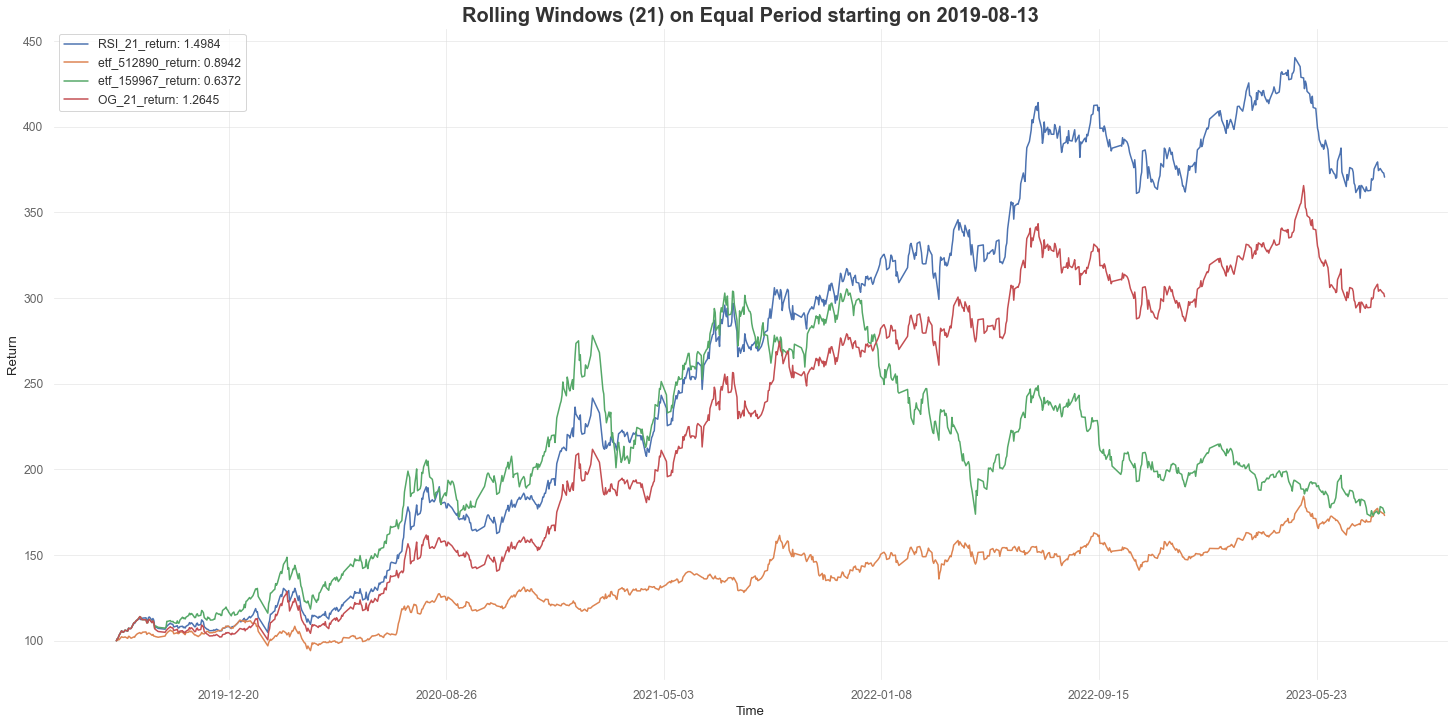

In [564]:
_ = plt.figure(figsize=(25, 12))
plt.xlabel('Time') 
plt.ylabel('Return')

_ = plt.plot(np.array(RSI_df['adj_signal_return_21'].index),RSI_df['adj_signal_return_21'].values)
_ = plt.plot(np.array(RSI_df['etf_512890_return'].index),RSI_df['etf_512890_return'].values)
_ = plt.plot(np.array(RSI_df['etf_159967_return'].index),RSI_df['etf_159967_return'].values)

_ = plt.plot(np.array(OG_df['signal_return_21'].index),OG_df['signal_return_21'].values)



_ = plt.legend([f'RSI_21_return: {round(Sharpe_adj_signal_return_21, 4)}', f'etf_512890_return: {round(Sharpe_etf_512980_return, 4)}',
                f'etf_159967_return: {round(Sharpe_etf_512480_return, 4)}', f'OG_21_return: {round(Sharpe_OG_return, 4)}'])

plt.title('Rolling Windows (21) on Equal Period starting on 2019-08-13', fontsize=20, fontweight='bold')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(250))

In [445]:
RSI_df = RSI_Strategy.RSI(data, window_list, 2)
RSI_df = RSI_df.iloc[122:,:]
RSI_df['signal_return_21'] = RSI_df['signal_return_21']/RSI_df['signal_return_21'][0] * 100

OG_df = Rolling.rolling_optimization_table(data, window_list, 2)
OG_df = OG_df.iloc[-len(RSI_df):,:]
OG_df['signal_return_21'] = OG_df['signal_return_21']/OG_df['signal_return_21'][0] * 100

In [446]:
RSI_df['etf_512890_return'] = np.cumprod(RSI_df['etf_512890_day_return']+1, axis=0)*100
RSI_df['etf_512890_return'] = RSI_df['etf_512890_return']/RSI_df['etf_512890_return'][0]*100

RSI_df['etf_159967_return'] = np.cumprod(RSI_df['etf_159967_day_return']+1, axis=0)*100
RSI_df['etf_159967_return'] = RSI_df['etf_159967_return']/RSI_df['etf_159967_return'][0]*100

In [448]:
Sharpe_adj_signal_return_21 = Test.get_Sharpe(RSI_df, 'signal_return_21')
Sharpe_etf_512980_return = Test.get_Sharpe(RSI_df, 'etf_512890_return')
Sharpe_etf_512480_return = Test.get_Sharpe(RSI_df, 'etf_159967_return')
Sharpe_OG_return = Test.get_Sharpe(OG_df, 'signal_return_21')

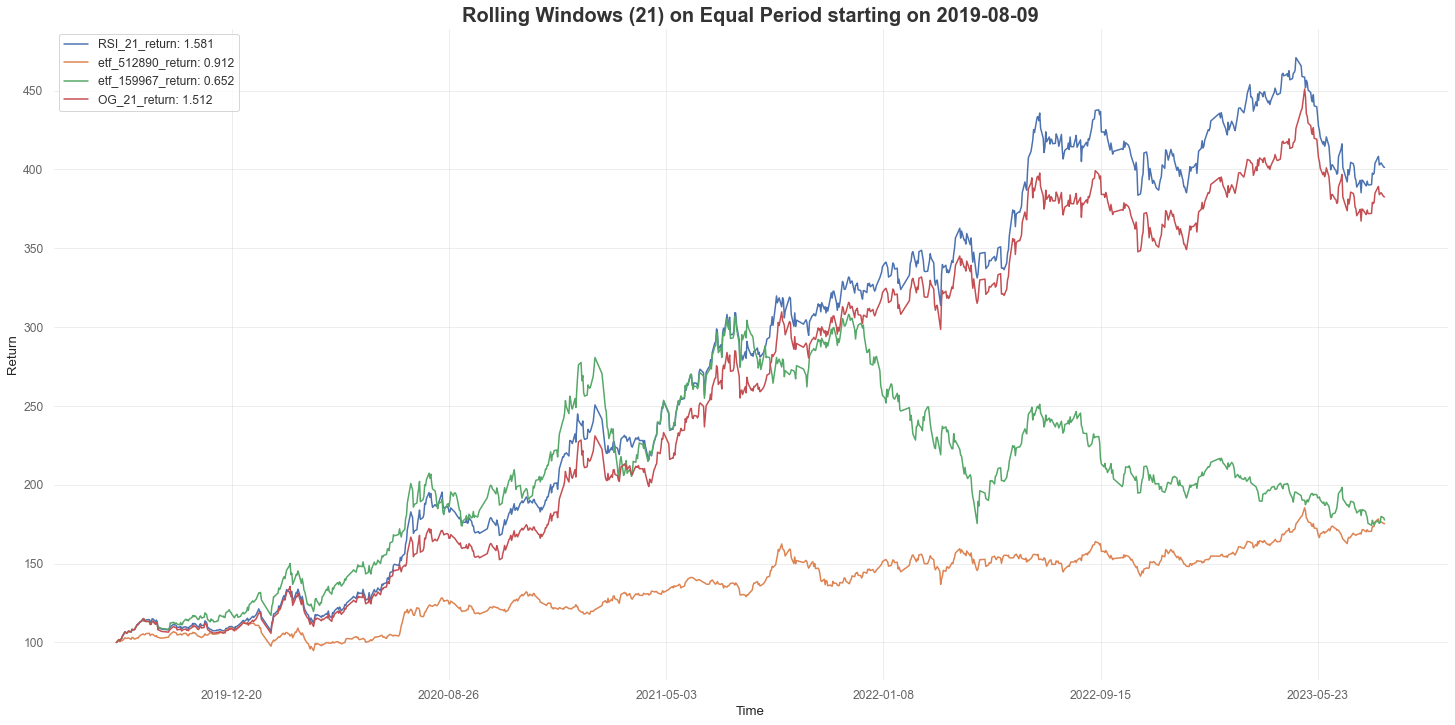

In [449]:
_ = plt.figure(figsize=(25, 12))
plt.xlabel('Time') 
plt.ylabel('Return')

_ = plt.plot(np.array(RSI_df['signal_return_21'].index),RSI_df['signal_return_21'].values)
_ = plt.plot(np.array(RSI_df['etf_512890_return'].index),RSI_df['etf_512890_return'].values)
_ = plt.plot(np.array(RSI_df['etf_159967_return'].index),RSI_df['etf_159967_return'].values)

_ = plt.plot(np.array(OG_df['signal_return_21'].index),OG_df['signal_return_21'].values)



_ = plt.legend([f'RSI_21_return: {round(Sharpe_adj_signal_return_21, 3)}', f'etf_512890_return: {round(Sharpe_etf_512980_return, 3)}',
                f'etf_159967_return: {round(Sharpe_etf_512480_return, 3)}', f'OG_21_return: {round(Sharpe_OG_return, 3)}'])

plt.title('Rolling Windows (21) on Equal Period starting on 2019-08-09', fontsize=20, fontweight='bold')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(250))